In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
import dgl_functions
from dgl_functions import *
import dgl_models
from dgl_models import *

In [4]:
from custom_models_fingerprints import *

In [5]:
use_fingerprints = False

apply_scaffold_split = True

create_new_data = False

In [6]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "DGL"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_dgl_regression/model_gnn_conv"
    else:
        filename_basic = "results_dgl_regression/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_dgl_regression_scaffold/model_gnn_conv"
    else:
        filename_basic = "results_dgl_regression_scaffold/model_gnn_conv"

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [7]:
param_combinations = dict()

hidden_channels_list = [[64], [256], [512]]
linear_sizes_list = [[], [512], [512, 256]]
gcn_layers_list = [1, 2, 3, 4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

In [8]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

In [9]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [10]:
batch_size = 64

In [11]:
print(len(combinations))

108


In [12]:
param_combinations = dict()

hidden_feats = [[64], [64, 64], [64, 64, 64], [64, 64, 64, 64], [128], [128, 128], [128, 128, 128], [128, 128, 128, 128], [256], [256, 256], [256, 256, 256], [256, 256, 256, 256], [512], [512, 512], [512, 512, 512], [512, 512, 512, 512]]

predictor_hidden_feats = [128, 256, 512, 1024]
keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [13]:
param_combinations = dict()


param_combinations["hidden_feats"] = [[64], [64, 64], [64, 64, 64], [64, 64, 64, 64], [128], [128, 128], [128, 128, 128], [128, 128, 128, 128], [256], [256, 256], [256, 256, 256], [256, 256, 256, 256], [512], [512, 512], [512, 512, 512], [512, 512, 512, 512]]
param_combinations["predictor_hidden_feats"] = [128, 256, 512, 1024]
apply_scaffold_split_list = [apply_scaffold_split]
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

run: 0
{'hidden_feats': [64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385782B0D0>, <dgl.data.utils.Subset object at 0x000002385CB98550>, <dgl.data.utils.Subset object at 0x000002385CB987C0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequentia

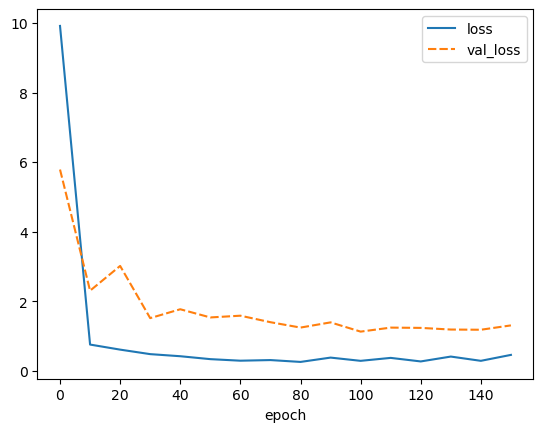

best weights loaded


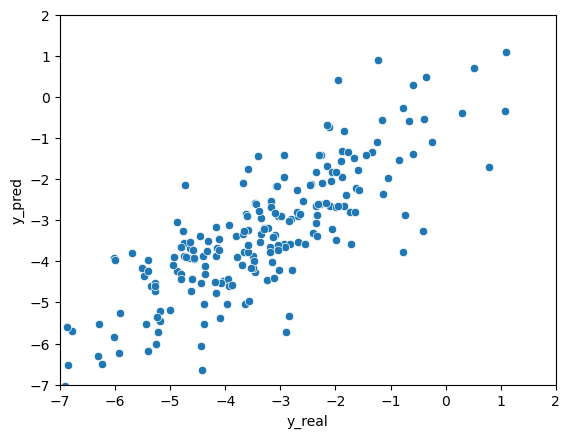

elapsed time: 65.39249205589294
run: 1
{'hidden_feats': [64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C988970>, <dgl.data.utils.Subset object at 0x00000238F89FC610>, <dgl.data.utils.Subset object at 0x00000238F89FC760>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPre

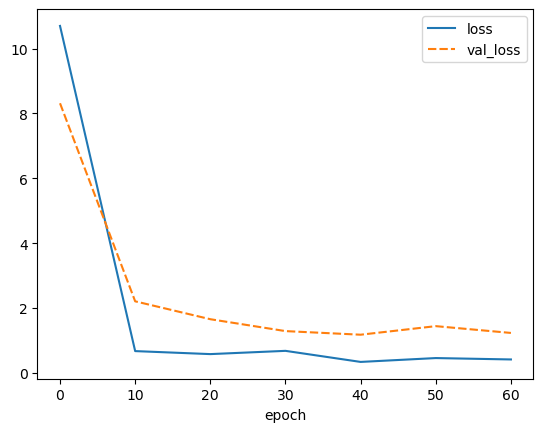

best weights loaded


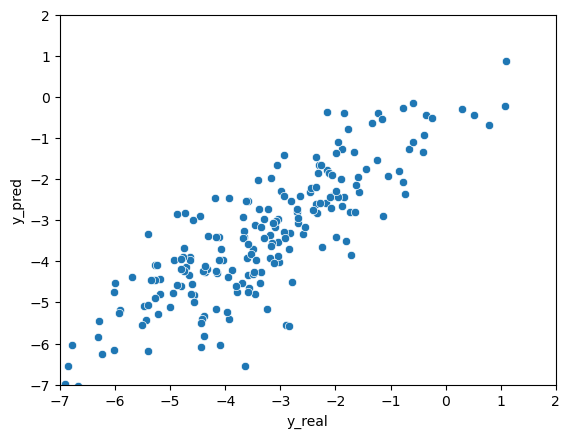

elapsed time: 30.62960696220398
run: 2
{'hidden_feats': [64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C988460>, <dgl.data.utils.Subset object at 0x00000238FBB54BE0>, <dgl.data.utils.Subset object at 0x00000238FBB54E50>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPre

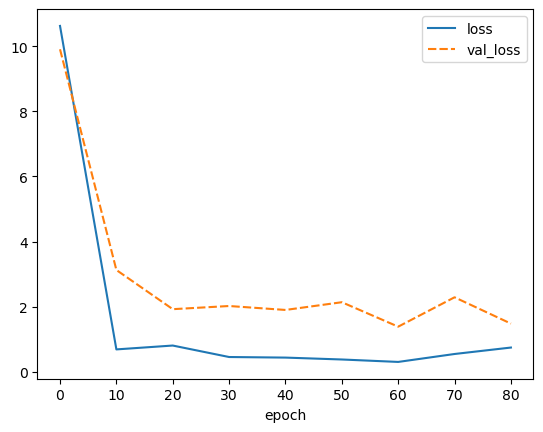

best weights loaded


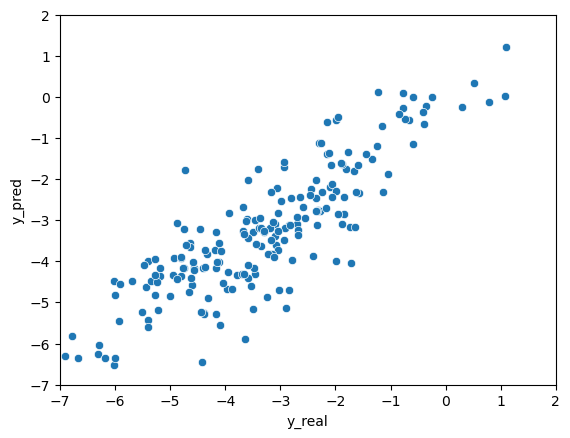

elapsed time: 36.12095761299133
run: 3
{'hidden_feats': [64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F85C4B80>, <dgl.data.utils.Subset object at 0x00000238FBB63940>, <dgl.data.utils.Subset object at 0x00000238FBB63BB0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPr

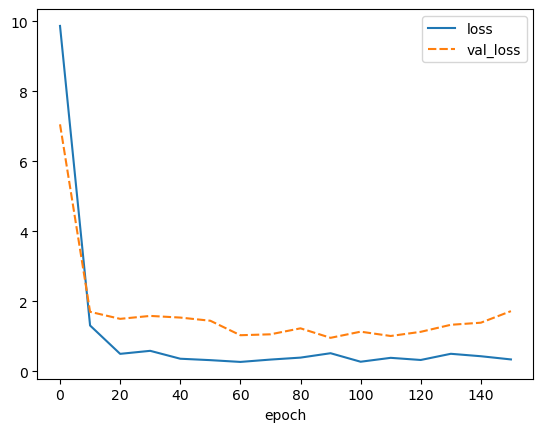

best weights loaded


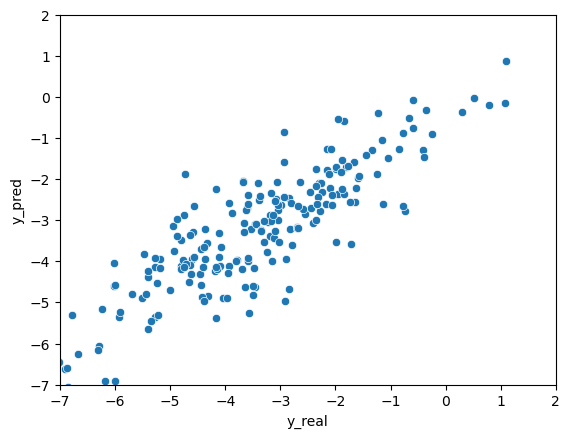

elapsed time: 64.61862230300903
run: 4
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C9E5C70>, <dgl.data.utils.Subset object at 0x00000238FBB47940>, <dgl.data.utils.Subset object at 0x00000238FBB47B20>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=6

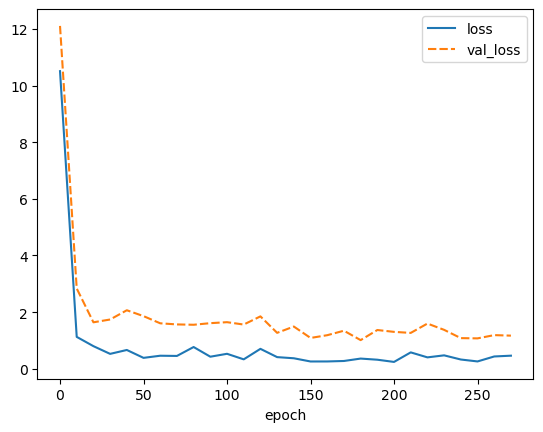

best weights loaded


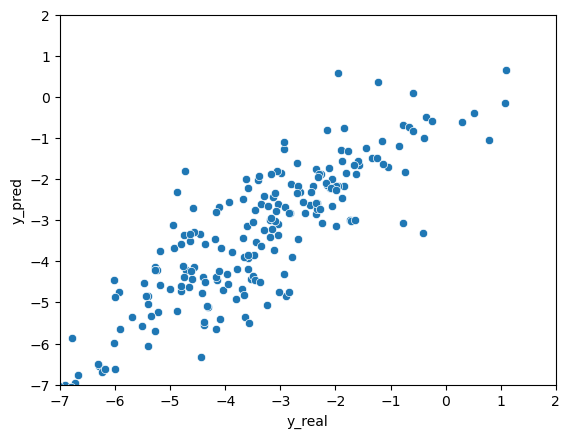

elapsed time: 124.98216223716736
run: 5
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F85B2190>, <dgl.data.utils.Subset object at 0x00000238F88F9D60>, <dgl.data.utils.Subset object at 0x00000238F88F9E80>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=

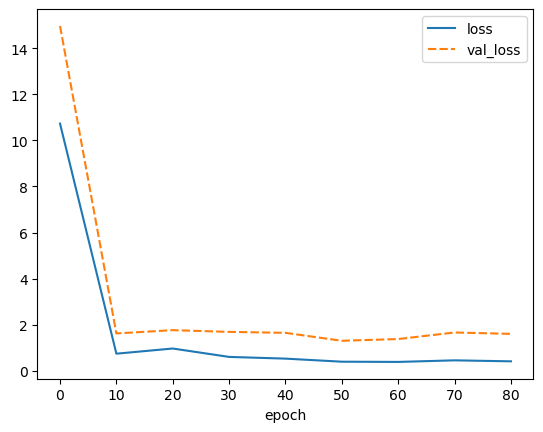

best weights loaded


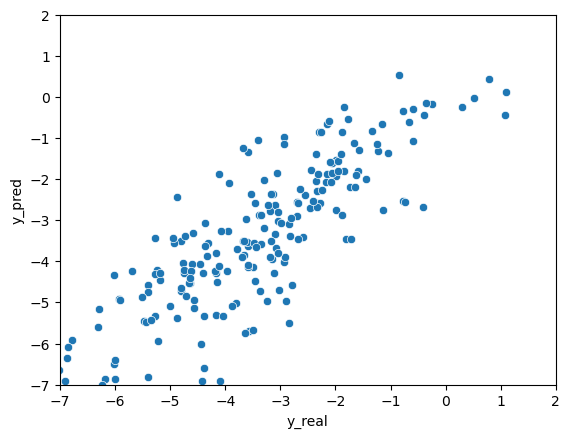

elapsed time: 40.536869764328
run: 6
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F8631580>, <dgl.data.utils.Subset object at 0x00000238FBB9FFA0>, <dgl.data.utils.Subset object at 0x00000238FBBA4250>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64,

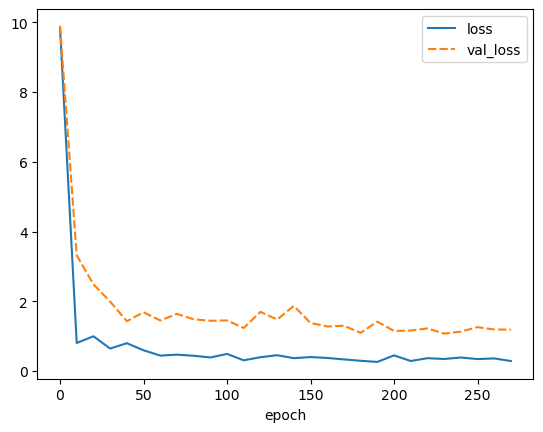

best weights loaded


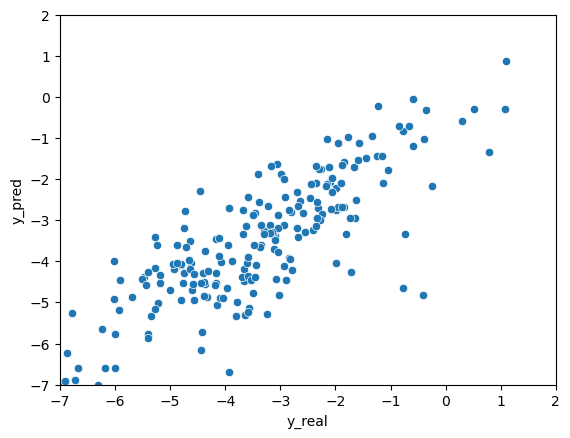

elapsed time: 119.88897037506104
run: 7
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F8682D00>, <dgl.data.utils.Subset object at 0x00000238FBC1F280>, <dgl.data.utils.Subset object at 0x00000238FBC1F4F0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features

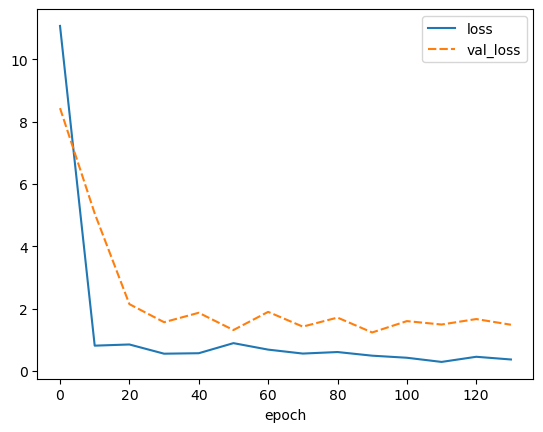

best weights loaded


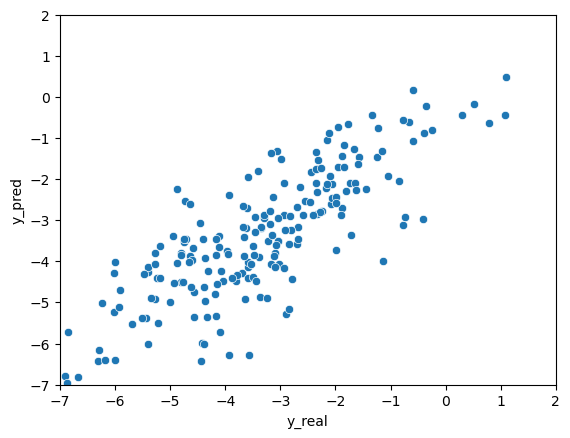

elapsed time: 56.833536863327026
run: 8
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F869CB50>, <dgl.data.utils.Subset object at 0x00000238FBAFF520>, <dgl.data.utils.Subset object at 0x00000238FBAFF5B0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in

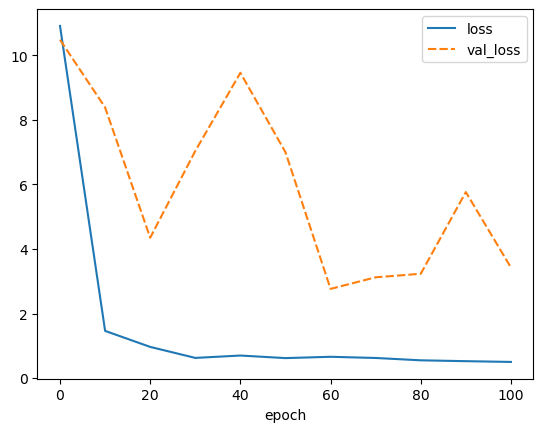

best weights loaded


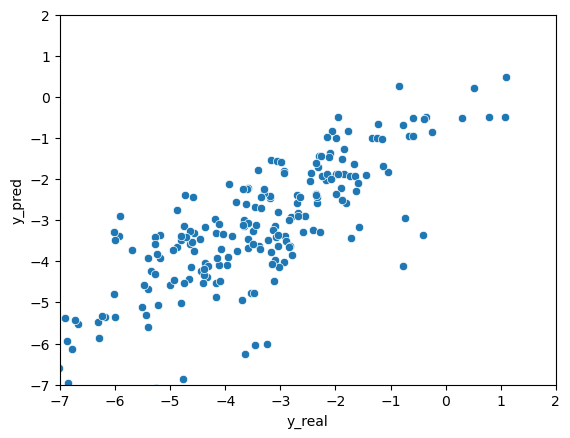

elapsed time: 52.71409058570862
run: 9
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F8506430>, <dgl.data.utils.Subset object at 0x000002385C9E5CA0>, <dgl.data.utils.Subset object at 0x00000238F89D8910>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_

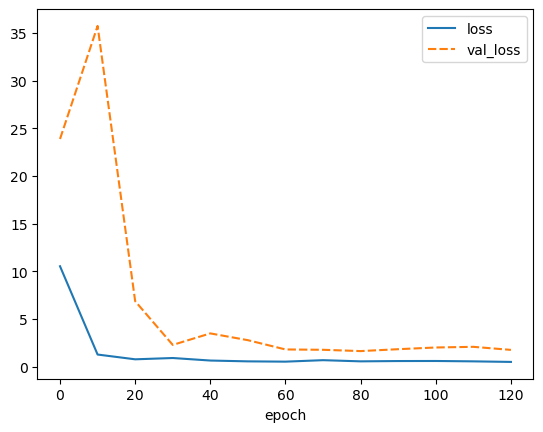

best weights loaded


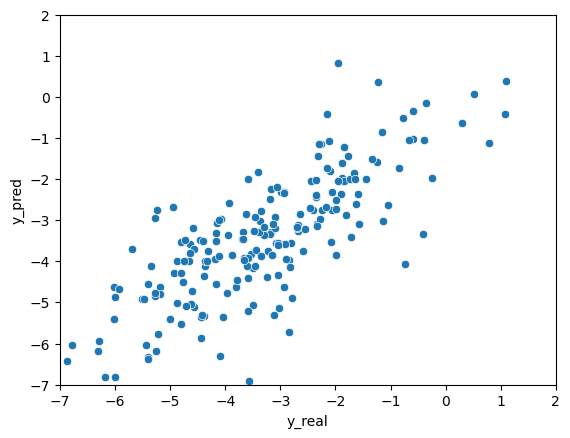

elapsed time: 61.39634466171265
run: 10
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F85562B0>, <dgl.data.utils.Subset object at 0x00000238FBB9F400>, <dgl.data.utils.Subset object at 0x00000238FBB8F2E0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in

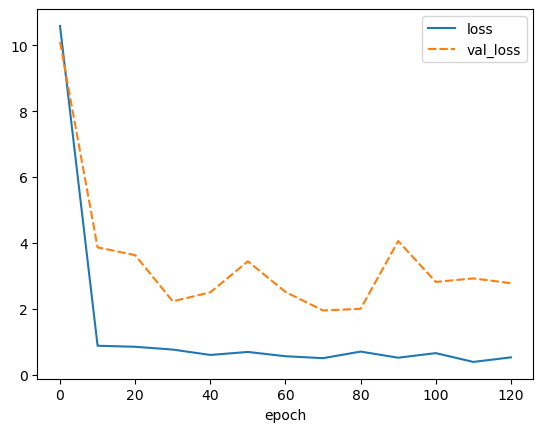

best weights loaded


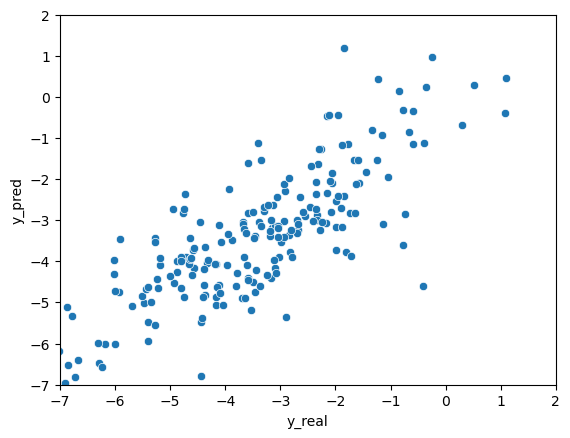

elapsed time: 62.79608488082886
run: 11
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C9044C0>, <dgl.data.utils.Subset object at 0x00000238FBBB87F0>, <dgl.data.utils.Subset object at 0x00000238FBBB85E0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(i

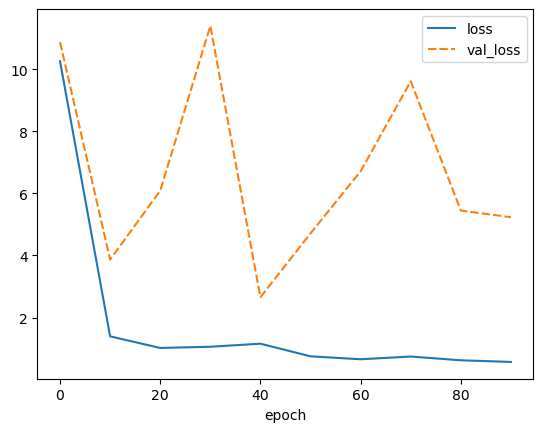

best weights loaded


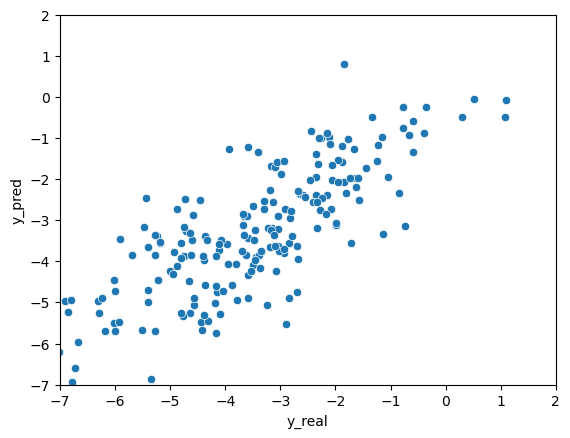

elapsed time: 46.431307315826416
run: 12
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C8C9D60>, <dgl.data.utils.Subset object at 0x00000238FBB042B0>, <dgl.data.utils.Subset object at 0x00000238FBA035E0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Line

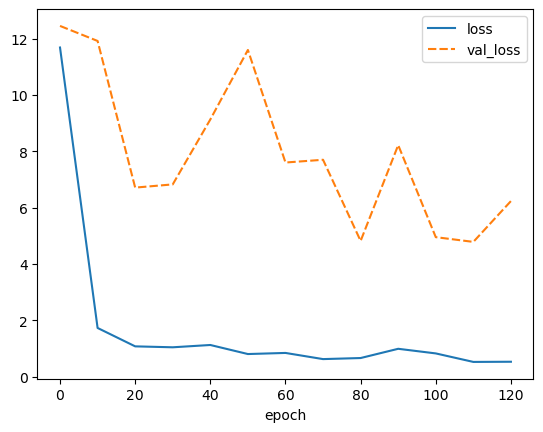

best weights loaded


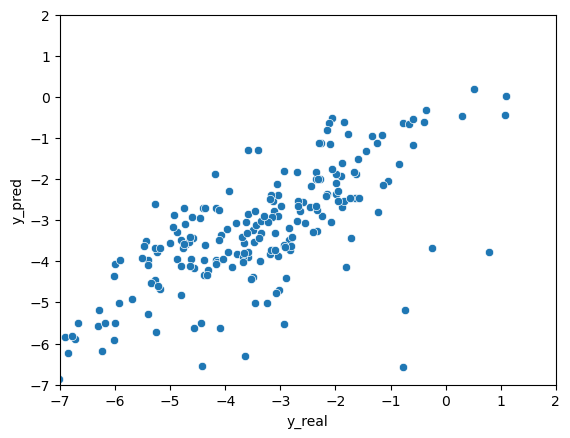

elapsed time: 71.08116102218628
run: 13
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000023859D7DB50>, <dgl.data.utils.Subset object at 0x00000238F8954460>, <dgl.data.utils.Subset object at 0x00000238F8941CD0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linea

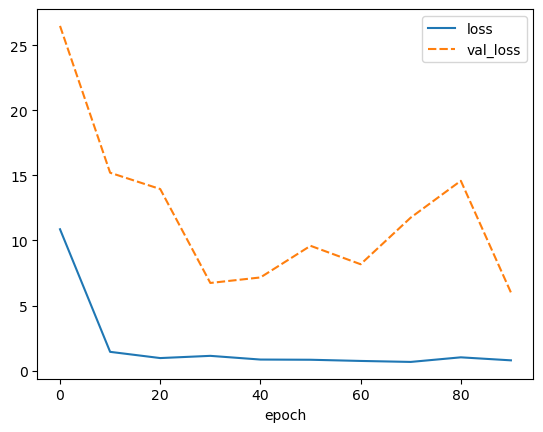

best weights loaded


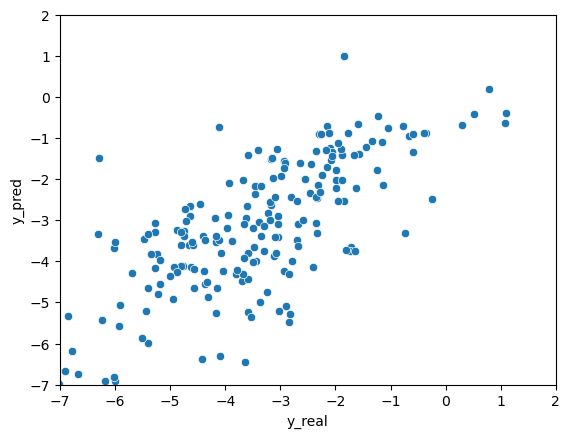

elapsed time: 55.455299377441406
run: 14
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385CAEB910>, <dgl.data.utils.Subset object at 0x00000238FBAC9E50>, <dgl.data.utils.Subset object at 0x00000238FBAC93D0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Line

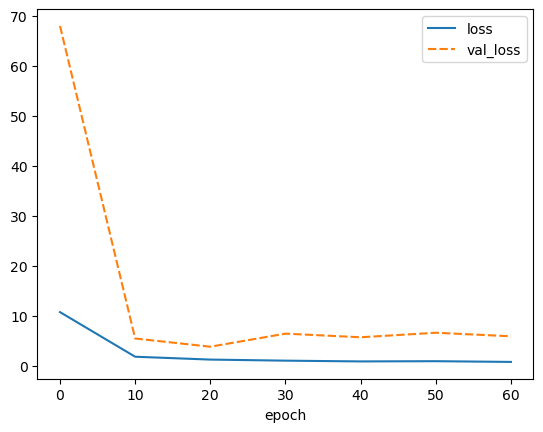

best weights loaded


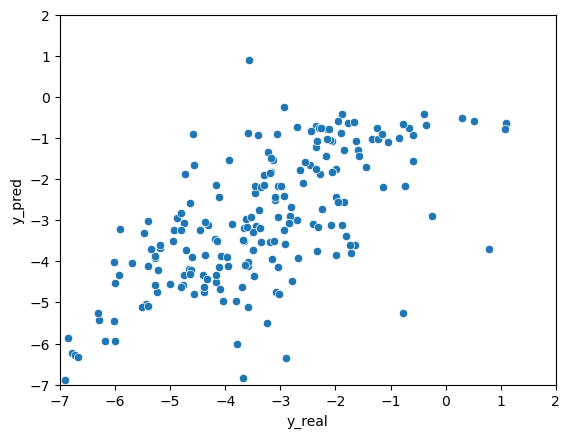

elapsed time: 39.53711485862732
run: 15
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F890CAF0>, <dgl.data.utils.Subset object at 0x00000238FBBE8F70>, <dgl.data.utils.Subset object at 0x00000238FBBE8CD0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Line

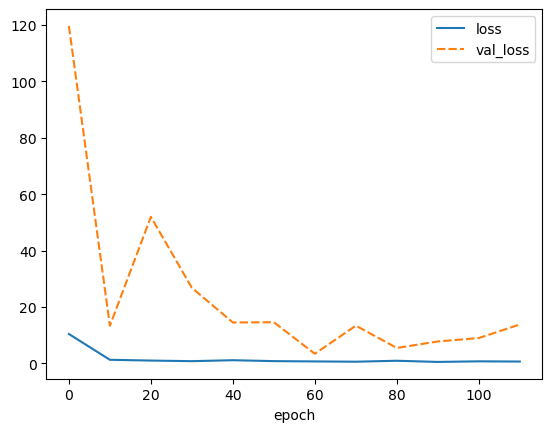

best weights loaded


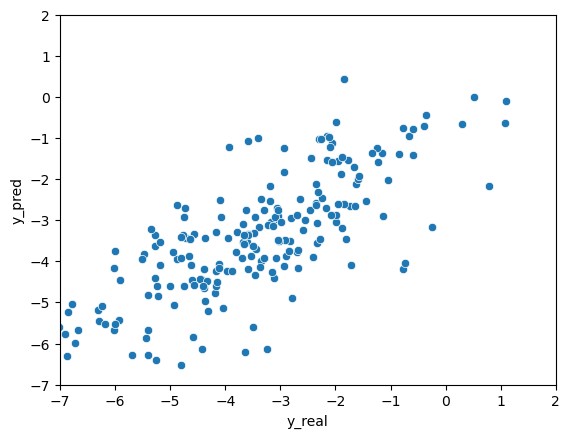

elapsed time: 67.43405961990356
run: 16
{'hidden_feats': [128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C7E3430>, <dgl.data.utils.Subset object at 0x00000238F85C8D00>, <dgl.data.utils.Subset object at 0x000002385C6303D0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): 

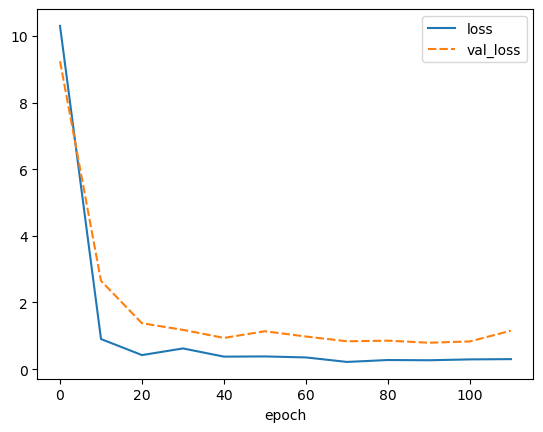

best weights loaded


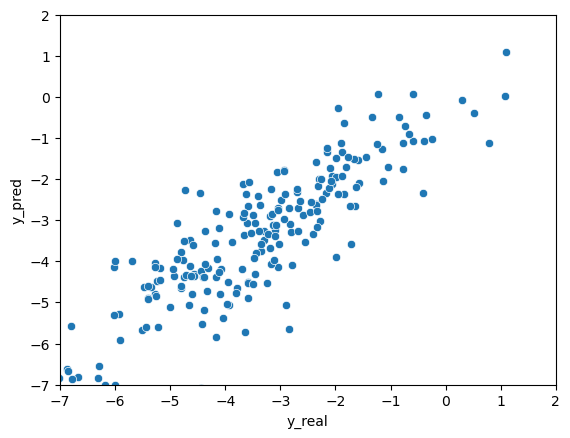

elapsed time: 40.20862364768982
run: 17
{'hidden_feats': [128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000023835CEC370>, <dgl.data.utils.Subset object at 0x00000238FBC6F2B0>, <dgl.data.utils.Subset object at 0x00000238FBC6F520>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): 

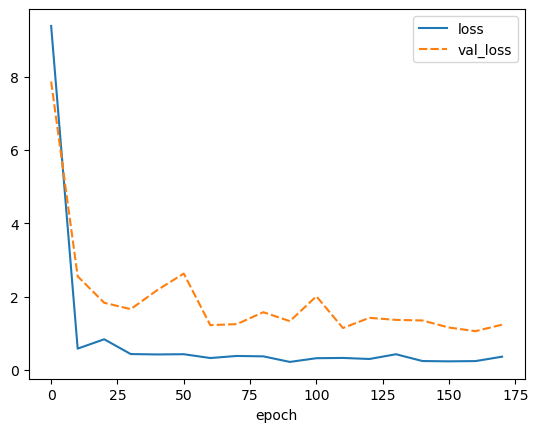

best weights loaded


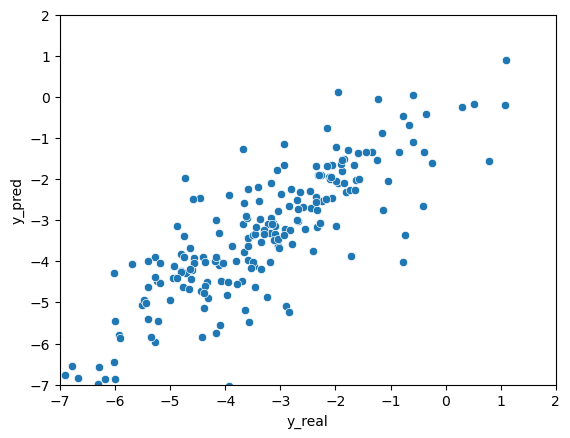

elapsed time: 58.61312437057495
run: 18
{'hidden_feats': [128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F88411F0>, <dgl.data.utils.Subset object at 0x000002385C6E34C0>, <dgl.data.utils.Subset object at 0x000002385C6E3A90>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): 

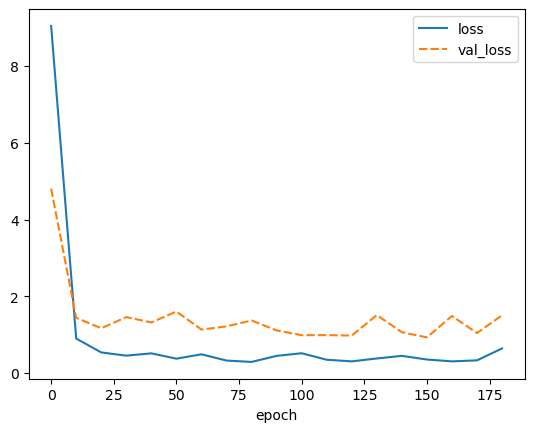

best weights loaded


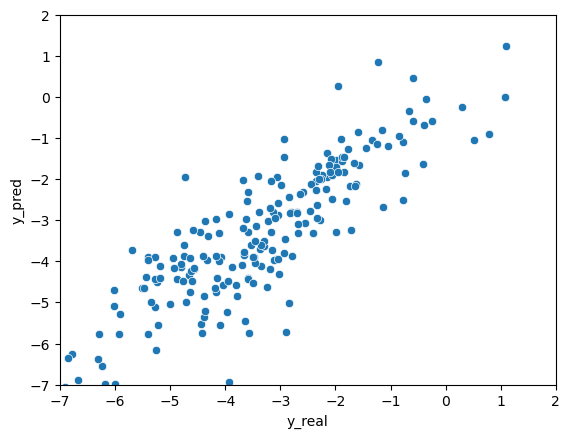

elapsed time: 62.69143486022949
run: 19
{'hidden_feats': [128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F86F9640>, <dgl.data.utils.Subset object at 0x000002385C7E3430>, <dgl.data.utils.Subset object at 0x000002385C7E37C0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict):

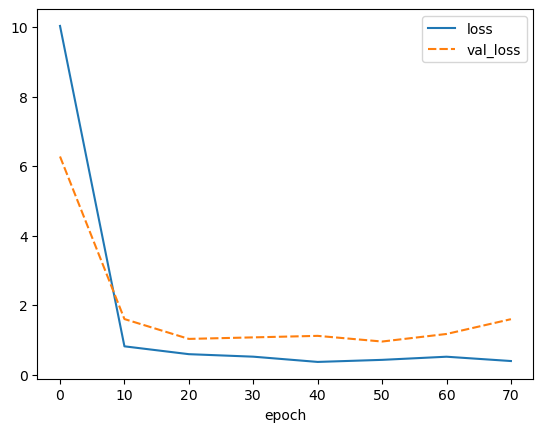

best weights loaded


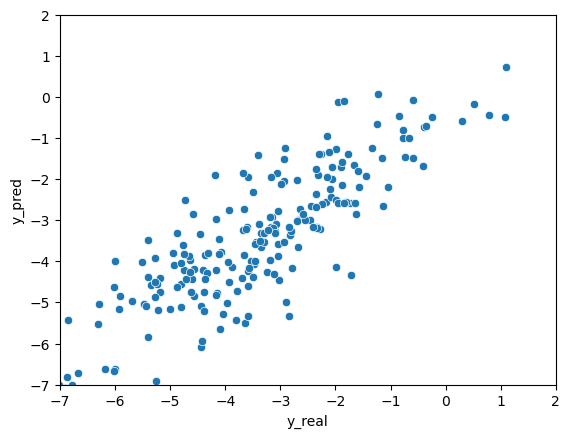

elapsed time: 27.697052240371704
run: 20
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F852F880>, <dgl.data.utils.Subset object at 0x000002385CA46580>, <dgl.data.utils.Subset object at 0x000002385CA467F0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_f

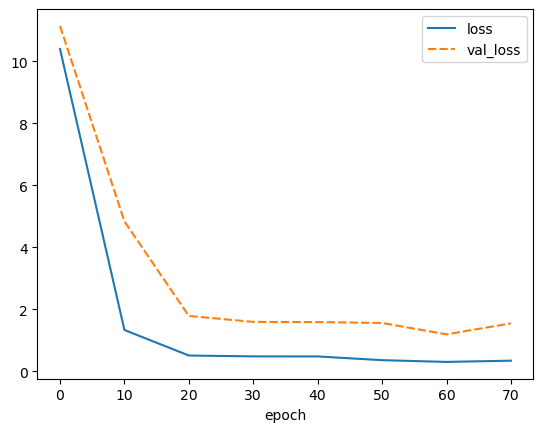

best weights loaded


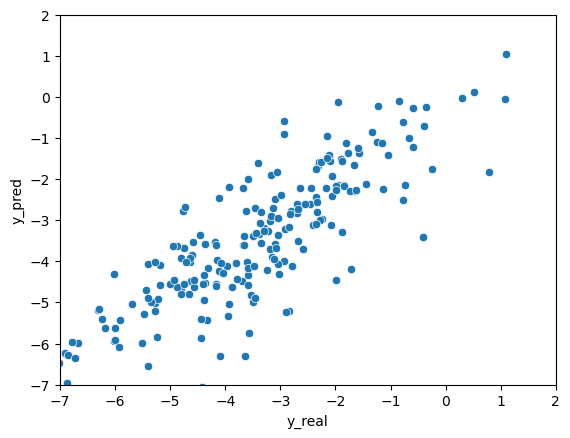

elapsed time: 36.239981174468994
run: 21
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238FBB8CCD0>, <dgl.data.utils.Subset object at 0x00000238FBC8C820>, <dgl.data.utils.Subset object at 0x00000238FBC8CA90>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_f

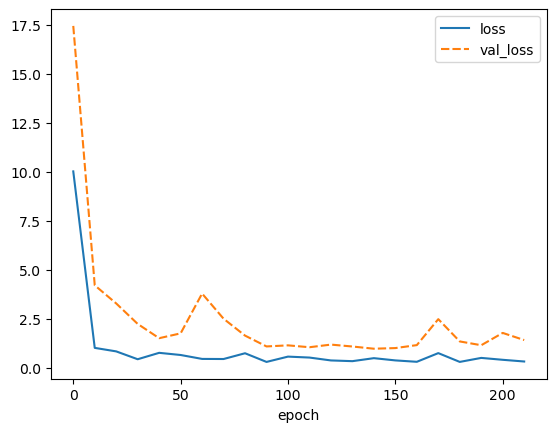

best weights loaded


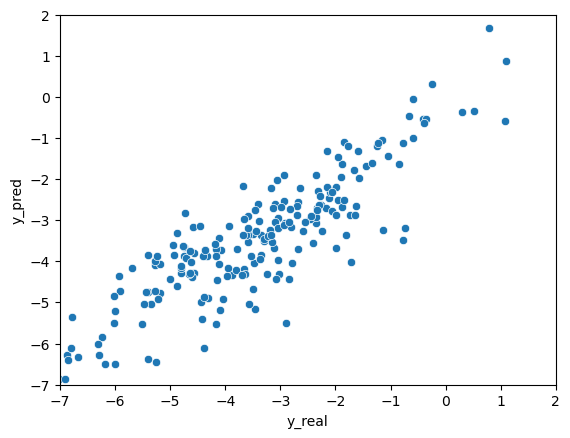

elapsed time: 96.34408736228943
run: 22
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C988070>, <dgl.data.utils.Subset object at 0x00000238FBC0D8E0>, <dgl.data.utils.Subset object at 0x00000238FBC0D460>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

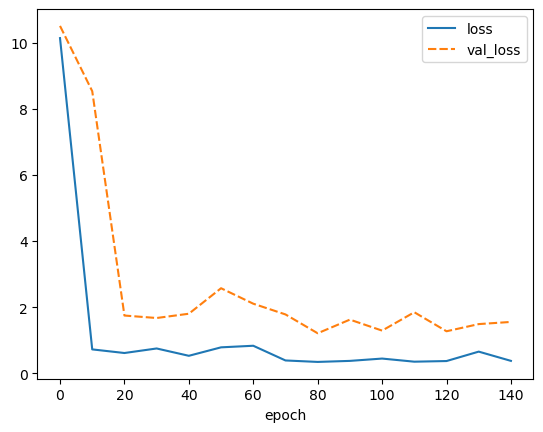

best weights loaded


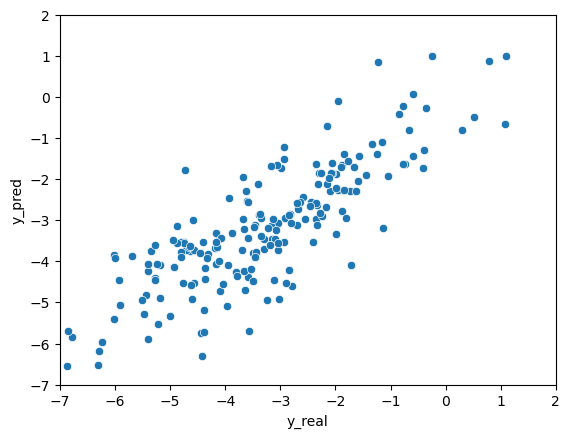

elapsed time: 66.0390841960907
run: 23
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C7E9EB0>, <dgl.data.utils.Subset object at 0x000002385C5B3880>, <dgl.data.utils.Subset object at 0x00000238F8547310>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

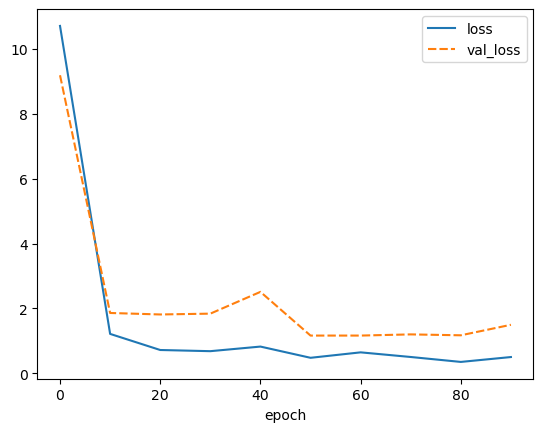

best weights loaded


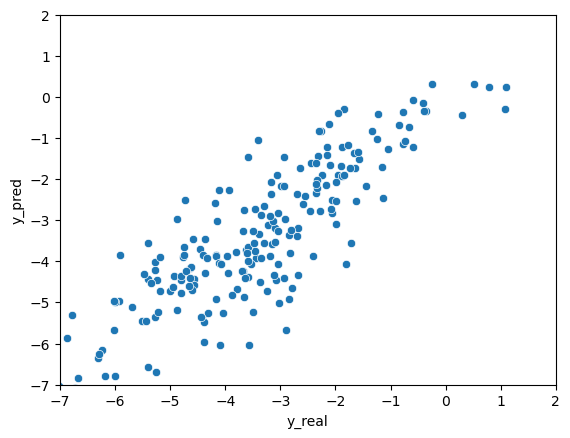

elapsed time: 46.601954221725464
run: 24
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F89B9730>, <dgl.data.utils.Subset object at 0x00000238FBC967C0>, <dgl.data.utils.Subset object at 0x00000238FBC96A30>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): 

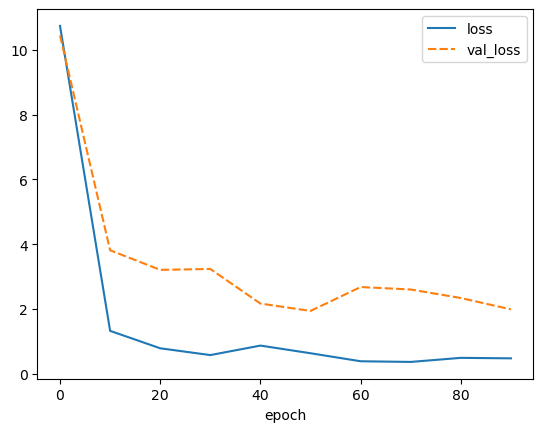

best weights loaded


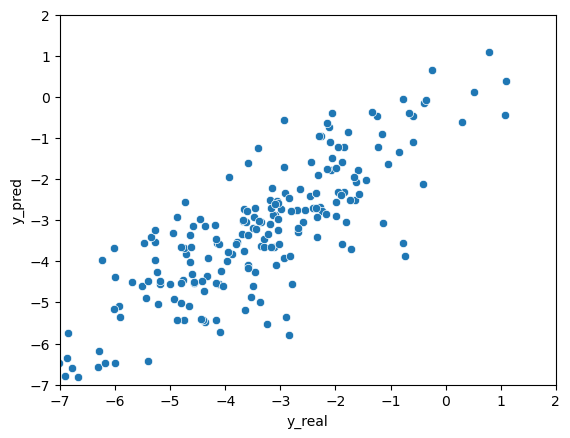

elapsed time: 43.902934312820435
run: 25
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238FBA1DA00>, <dgl.data.utils.Subset object at 0x00000238F8727190>, <dgl.data.utils.Subset object at 0x00000238F8727100>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): 

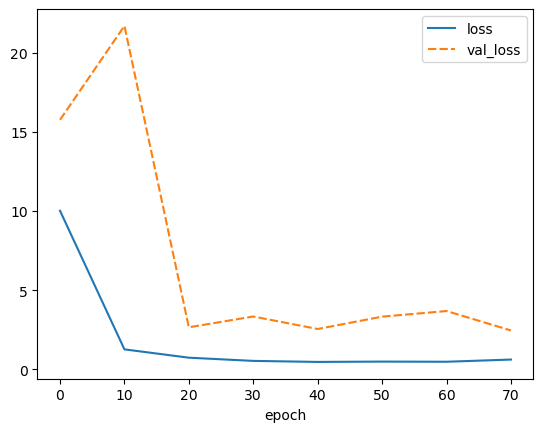

best weights loaded


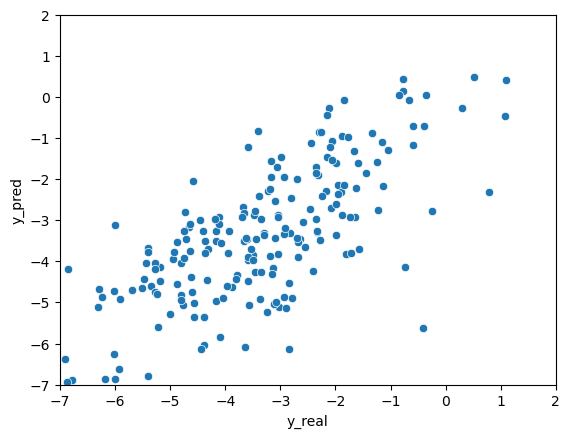

elapsed time: 38.128679275512695
run: 26
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F890C670>, <dgl.data.utils.Subset object at 0x0000023816525D00>, <dgl.data.utils.Subset object at 0x0000023816525EE0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): 

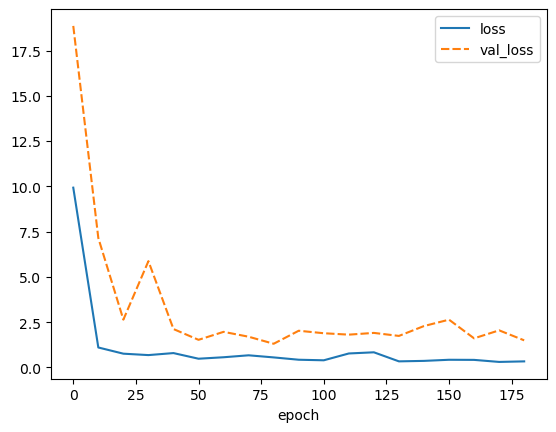

best weights loaded


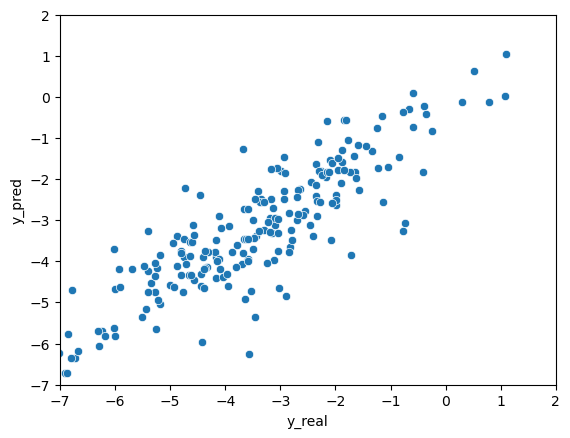

elapsed time: 96.6344006061554
run: 27
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C75B880>, <dgl.data.utils.Subset object at 0x000002385C928DC0>, <dgl.data.utils.Subset object at 0x000002385C928670>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): L

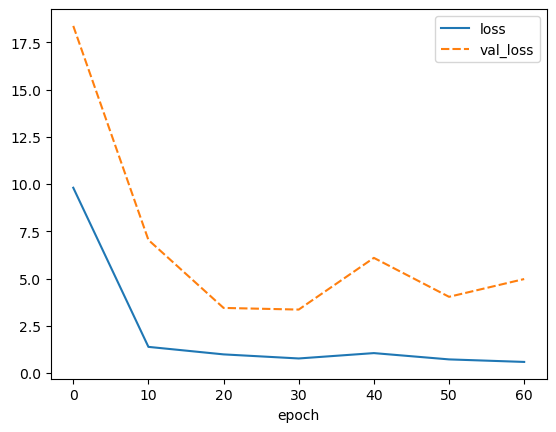

best weights loaded


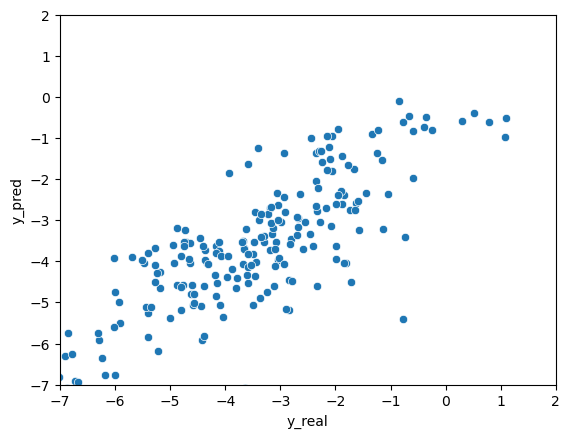

elapsed time: 34.68834447860718
run: 28
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F85C44C0>, <dgl.data.utils.Subset object at 0x00000238F87C1790>, <dgl.data.utils.Subset object at 0x00000238F87C1AC0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connectio

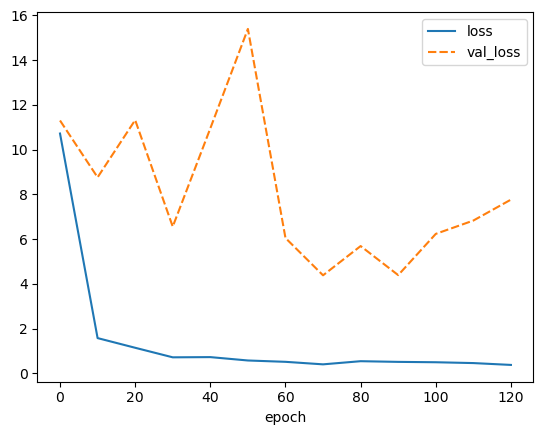

best weights loaded


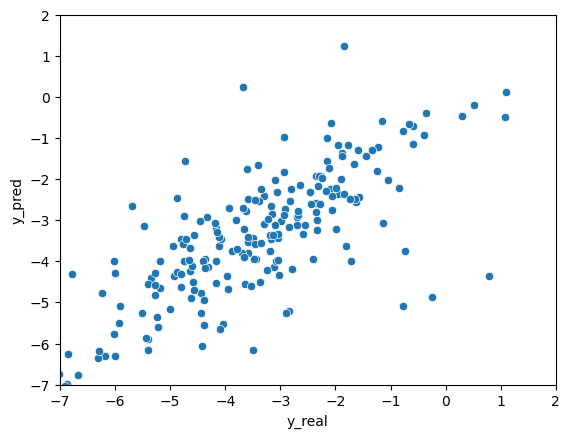

elapsed time: 66.11492371559143
run: 29
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F88959A0>, <dgl.data.utils.Subset object at 0x00000238F8534A90>, <dgl.data.utils.Subset object at 0x00000238F8534490>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connectio

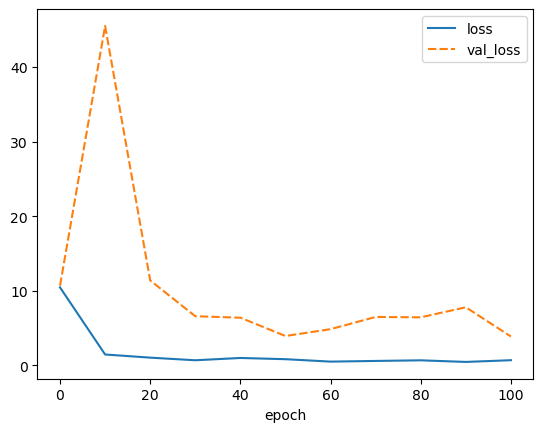

best weights loaded


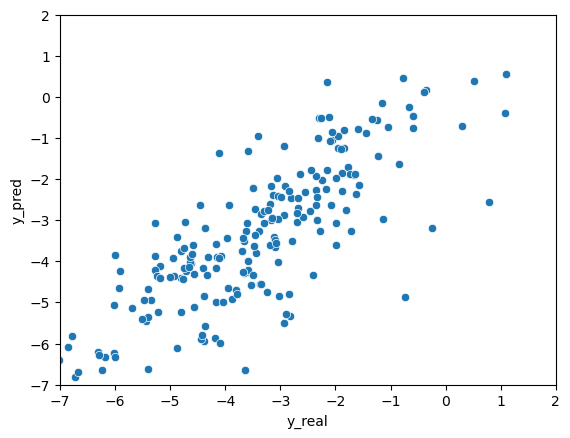

elapsed time: 54.275760650634766
run: 30
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F855E5B0>, <dgl.data.utils.Subset object at 0x00000238F861B5E0>, <dgl.data.utils.Subset object at 0x00000238F861BBE0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connecti

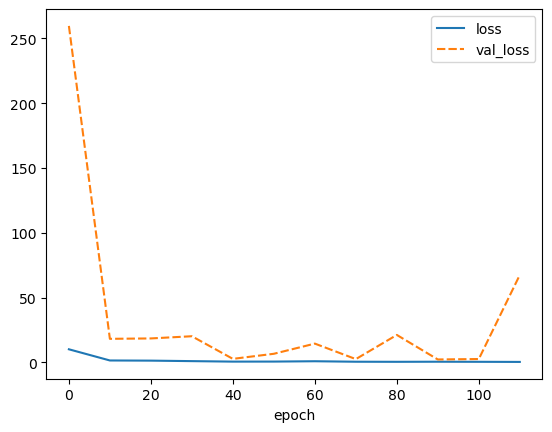

best weights loaded


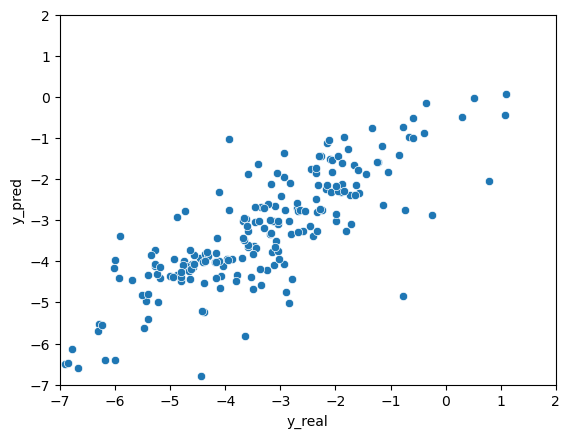

elapsed time: 64.05887818336487
run: 31
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C6DA1F0>, <dgl.data.utils.Subset object at 0x00000238F8534340>, <dgl.data.utils.Subset object at 0x000002385C80E970>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connecti

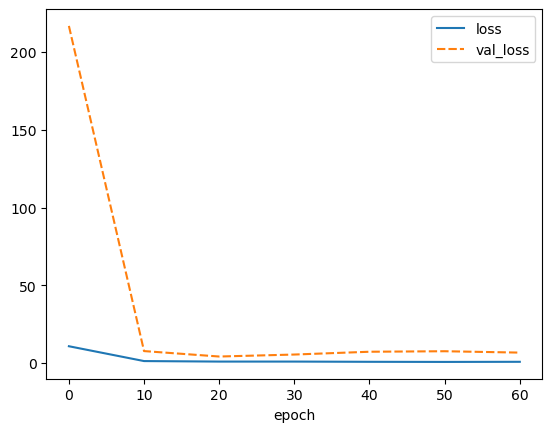

best weights loaded


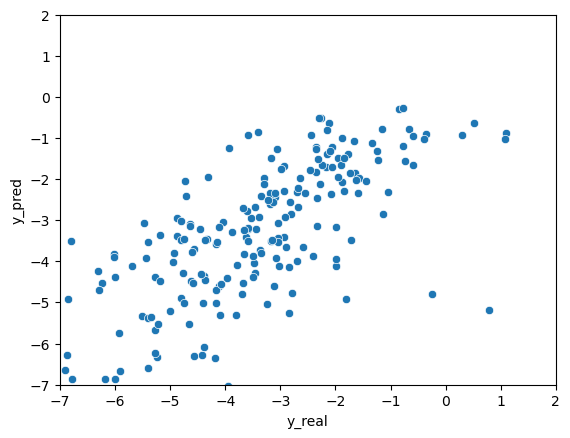

elapsed time: 33.89600324630737
run: 32
{'hidden_feats': [256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F87B3370>, <dgl.data.utils.Subset object at 0x00000238FDCE7520>, <dgl.data.utils.Subset object at 0x00000238FDCE74F0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): 

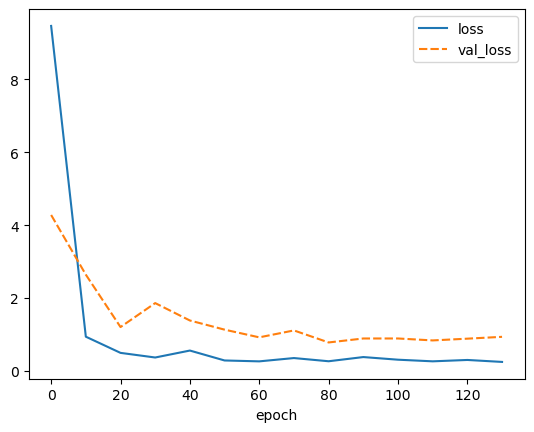

best weights loaded


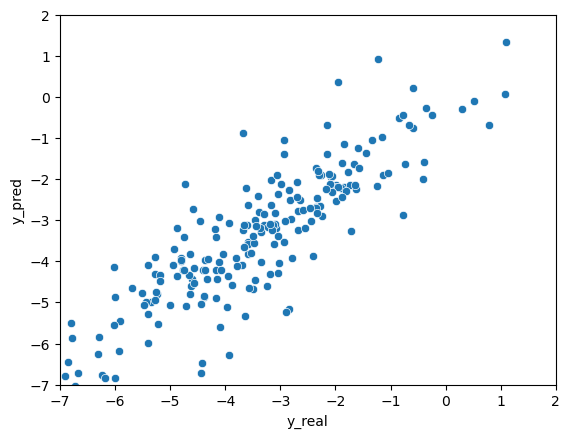

elapsed time: 46.39218258857727
run: 33
{'hidden_feats': [256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238FBA23A90>, <dgl.data.utils.Subset object at 0x000002385C7ECEE0>, <dgl.data.utils.Subset object at 0x000002381413CEB0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): 

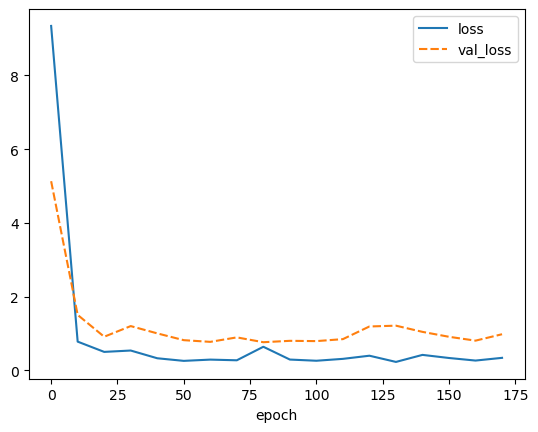

best weights loaded


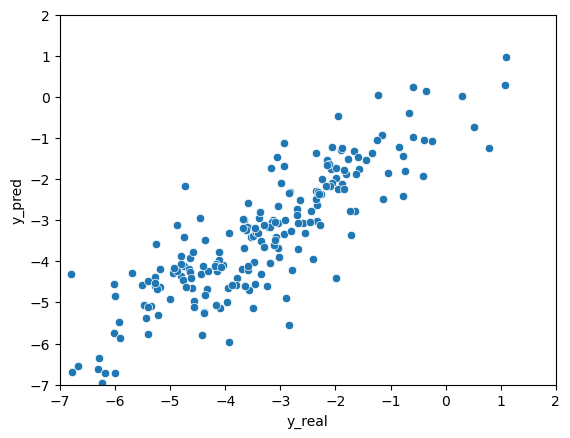

elapsed time: 59.206379413604736
run: 34
{'hidden_feats': [256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C64F8B0>, <dgl.data.utils.Subset object at 0x00000238FBC12760>, <dgl.data.utils.Subset object at 0x00000238FBC12CD0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict):

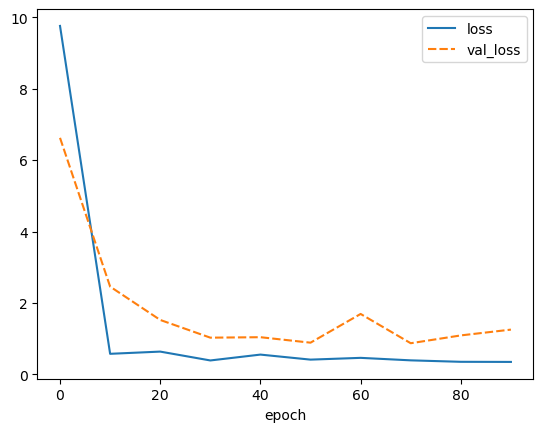

best weights loaded


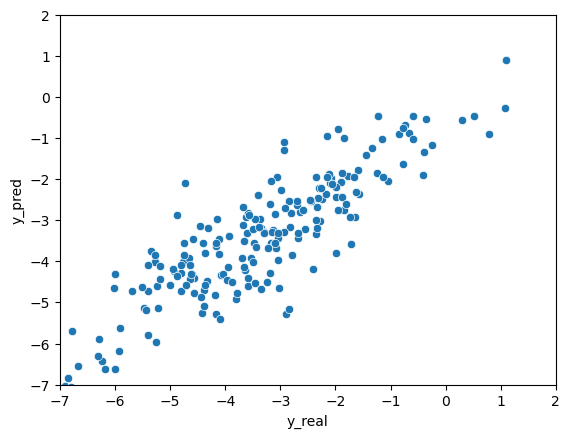

elapsed time: 31.92933702468872
run: 35
{'hidden_feats': [256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C91EC10>, <dgl.data.utils.Subset object at 0x00000238FBC87880>, <dgl.data.utils.Subset object at 0x00000238FBC878B0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict):

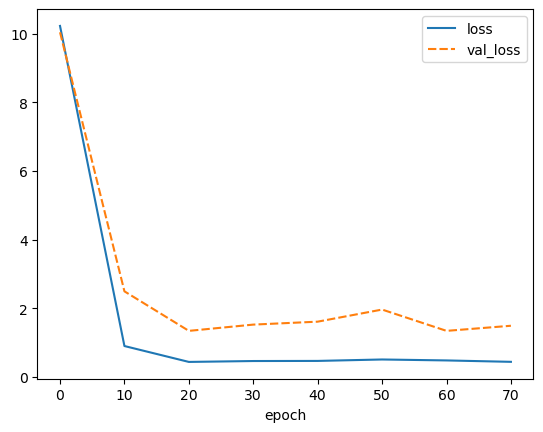

best weights loaded


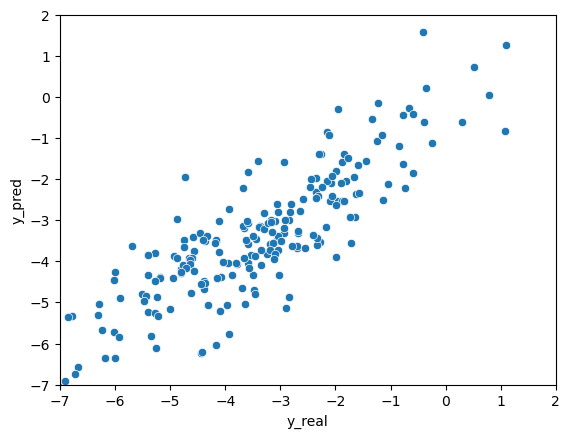

elapsed time: 25.773391008377075
run: 36
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385CA303A0>, <dgl.data.utils.Subset object at 0x000002385DD12C70>, <dgl.data.utils.Subset object at 0x000002385DD12EE0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_f

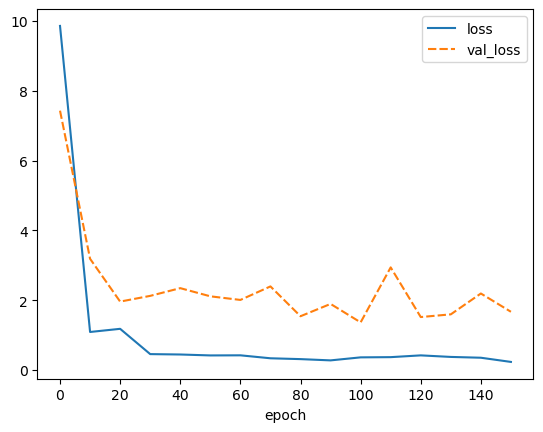

best weights loaded


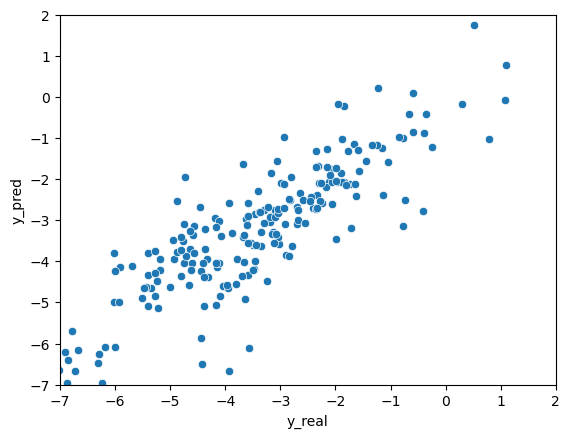

elapsed time: 62.4766628742218
run: 37
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385CAE58B0>, <dgl.data.utils.Subset object at 0x00000238165215E0>, <dgl.data.utils.Subset object at 0x00000238F875B6D0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fea

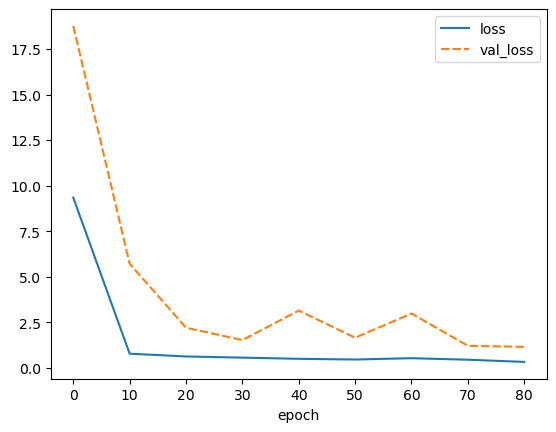

best weights loaded


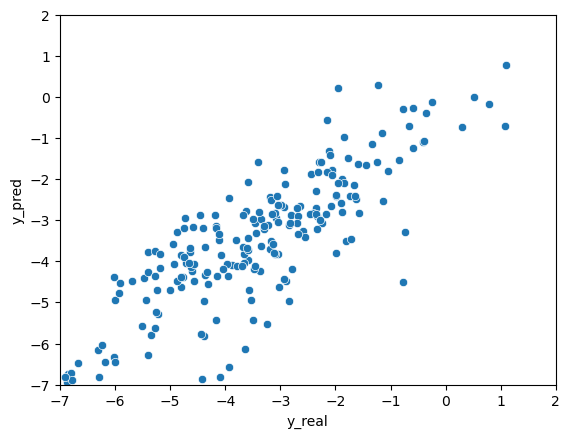

elapsed time: 35.30056715011597
run: 38
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F88B9D30>, <dgl.data.utils.Subset object at 0x00000238FF11ECD0>, <dgl.data.utils.Subset object at 0x00000238FF11EF40>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

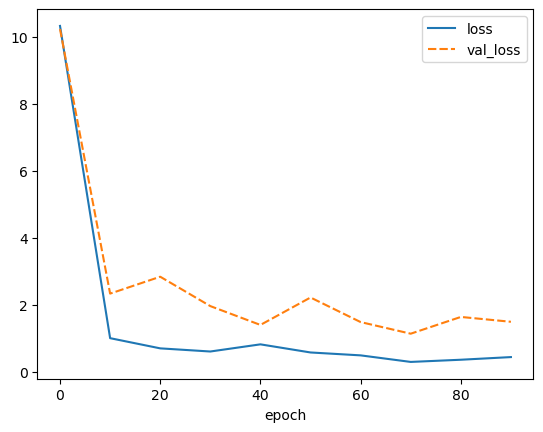

best weights loaded


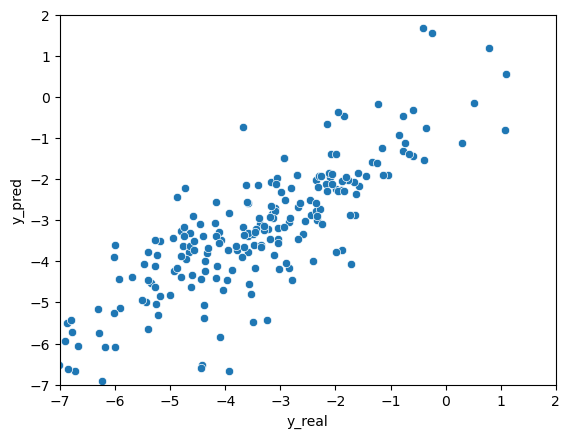

elapsed time: 40.12528944015503
run: 39
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F85CA910>, <dgl.data.utils.Subset object at 0x00000238F8939AF0>, <dgl.data.utils.Subset object at 0x00000238F8939D00>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_f

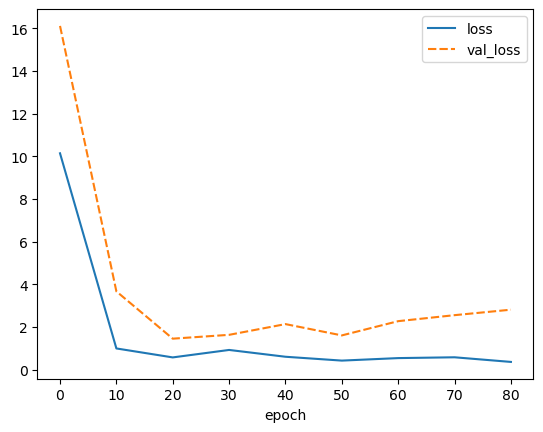

best weights loaded


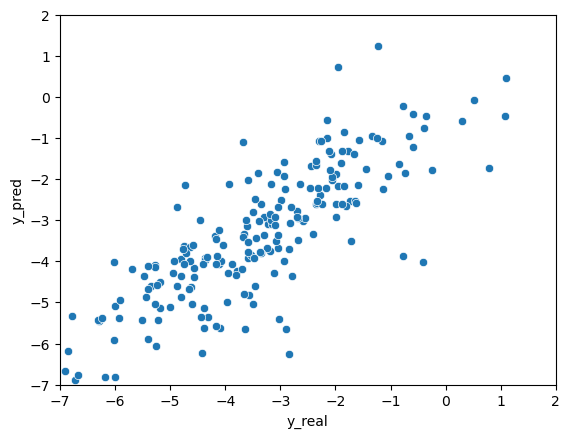

elapsed time: 38.262585401535034
run: 40
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F87C3160>, <dgl.data.utils.Subset object at 0x00000238F86A4880>, <dgl.data.utils.Subset object at 0x00000238F86A43A0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): 

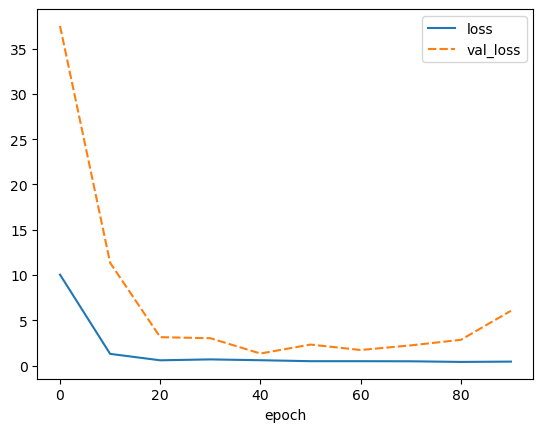

best weights loaded


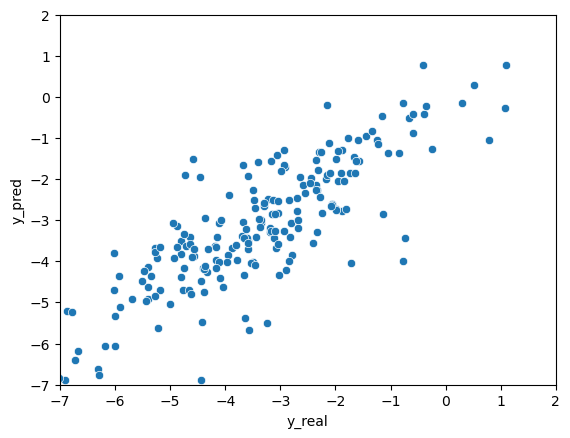

elapsed time: 45.030330419540405
run: 41
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F61D80D0>, <dgl.data.utils.Subset object at 0x00000238F87B3700>, <dgl.data.utils.Subset object at 0x00000238F61D8BB0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): 

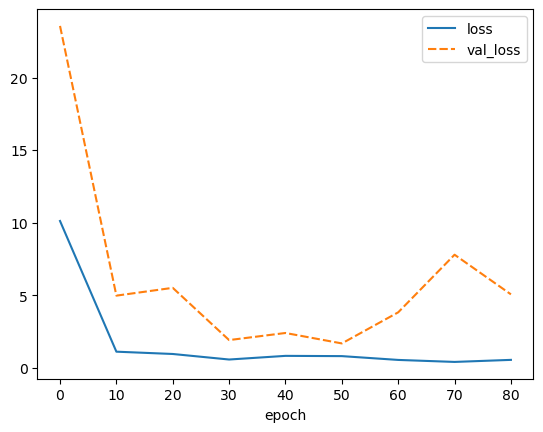

best weights loaded


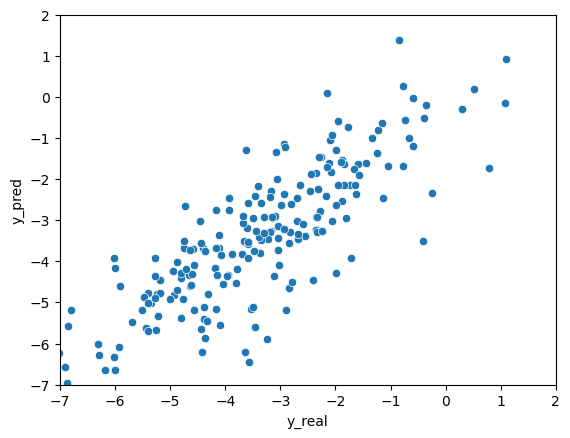

elapsed time: 42.8285653591156
run: 42
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C6B0190>, <dgl.data.utils.Subset object at 0x00000238FBC59280>, <dgl.data.utils.Subset object at 0x00000238FBC59640>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Li

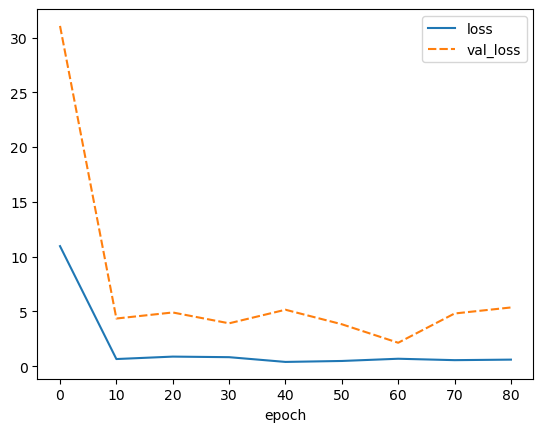

best weights loaded


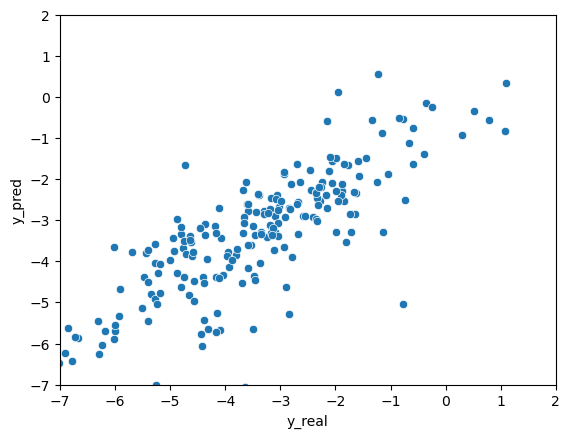

elapsed time: 41.363879919052124
run: 43
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F8602790>, <dgl.data.utils.Subset object at 0x00000238141214C0>, <dgl.data.utils.Subset object at 0x0000023814121580>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection):

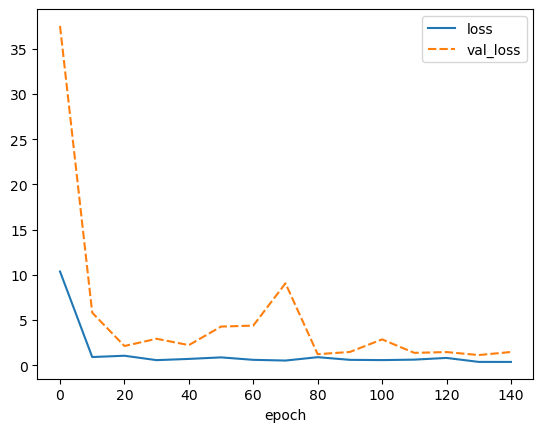

best weights loaded


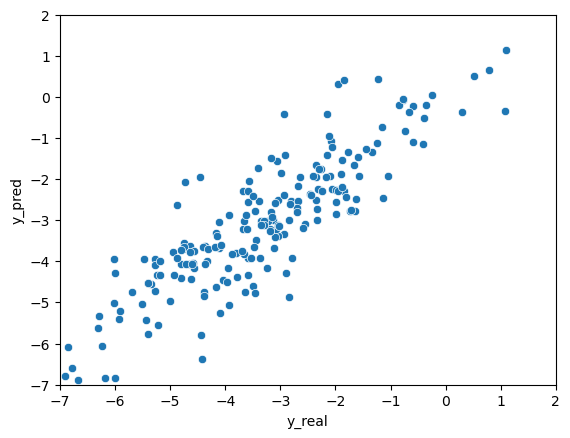

elapsed time: 73.07673048973083
run: 44
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F86BC400>, <dgl.data.utils.Subset object at 0x00000238F8851DC0>, <dgl.data.utils.Subset object at 0x00000238F8851AC0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connectio

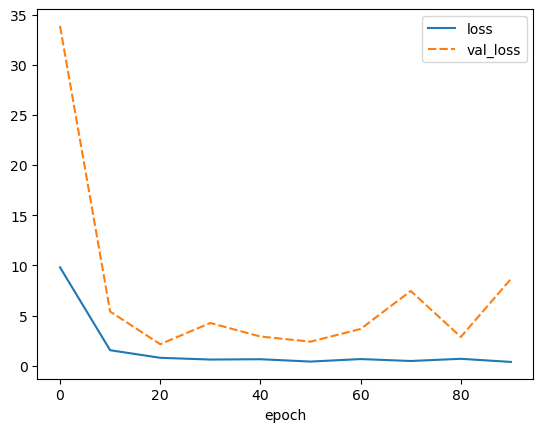

best weights loaded


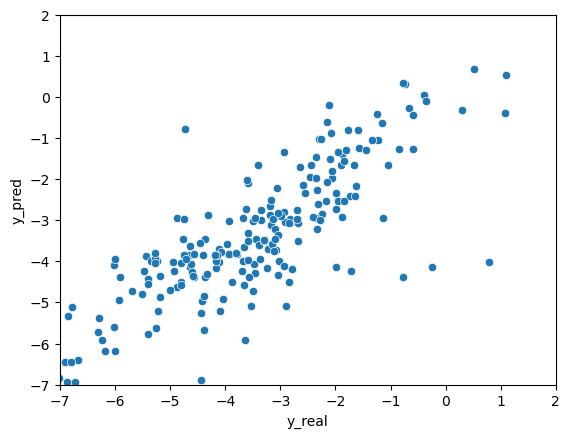

elapsed time: 56.06541085243225
run: 45
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F8640310>, <dgl.data.utils.Subset object at 0x00000238FF14FD90>, <dgl.data.utils.Subset object at 0x00000238FF14FA60>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connectio

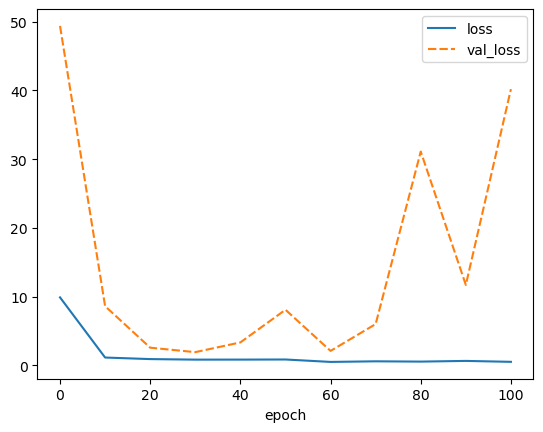

best weights loaded


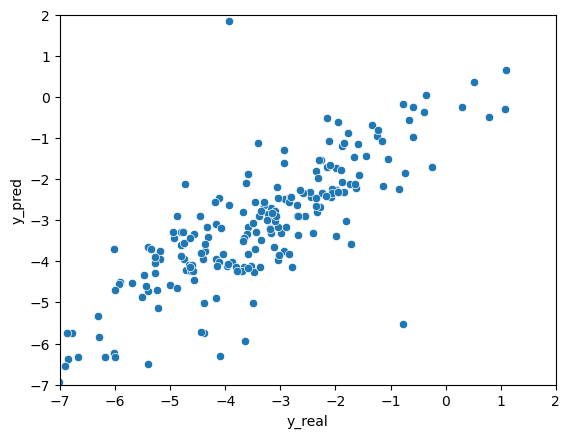

elapsed time: 61.39762473106384
run: 46
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F896C490>, <dgl.data.utils.Subset object at 0x00000238F8670CD0>, <dgl.data.utils.Subset object at 0x00000238F8670220>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connectio

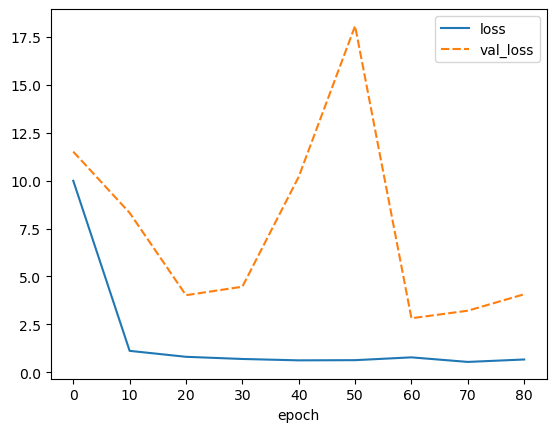

best weights loaded


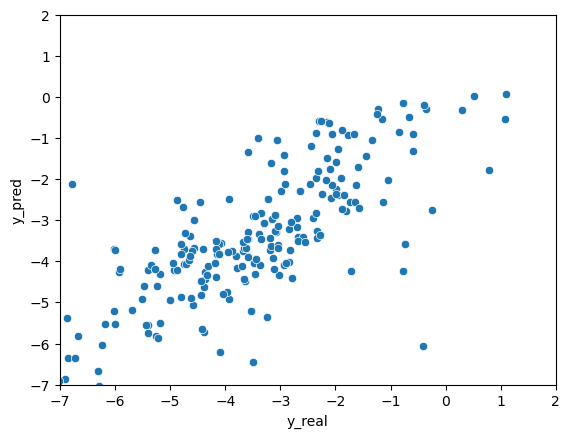

elapsed time: 49.562217235565186
run: 47
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C805190>, <dgl.data.utils.Subset object at 0x00000238F88FCF10>, <dgl.data.utils.Subset object at 0x00000238F8903490>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connect

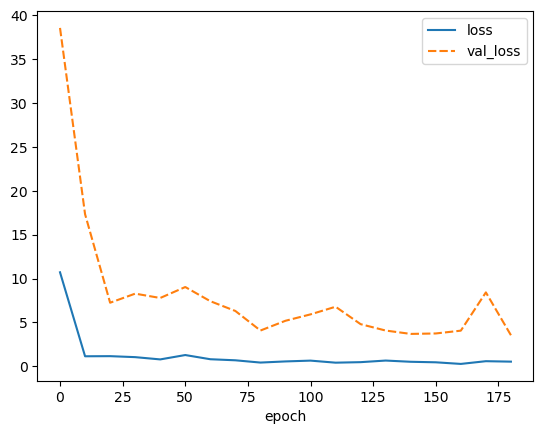

best weights loaded


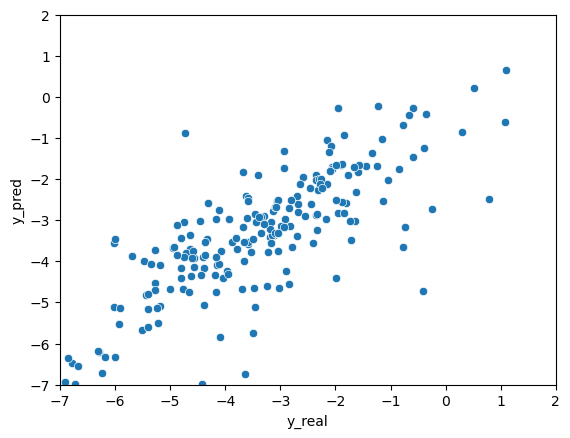

elapsed time: 105.67192888259888
run: 48
{'hidden_feats': [512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385CA835B0>, <dgl.data.utils.Subset object at 0x0000023814130C40>, <dgl.data.utils.Subset object at 0x0000023814130E20>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict):

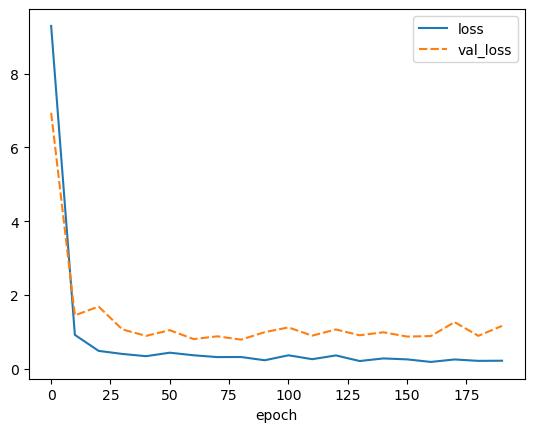

best weights loaded


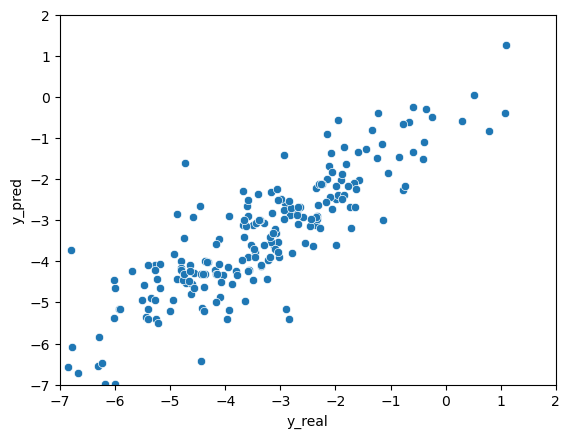

elapsed time: 64.74517774581909
run: 49
{'hidden_feats': [512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C940760>, <dgl.data.utils.Subset object at 0x00000238FF20CB80>, <dgl.data.utils.Subset object at 0x00000238FF20CDF0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): 

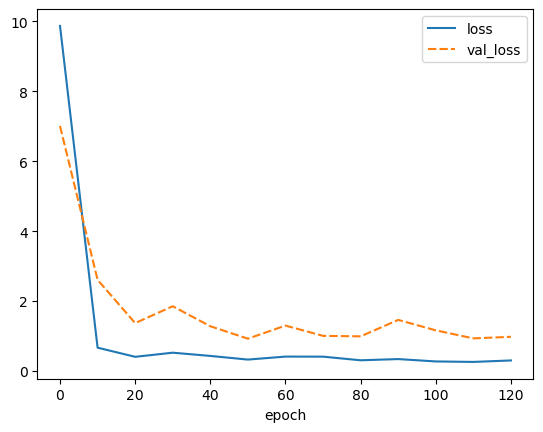

best weights loaded


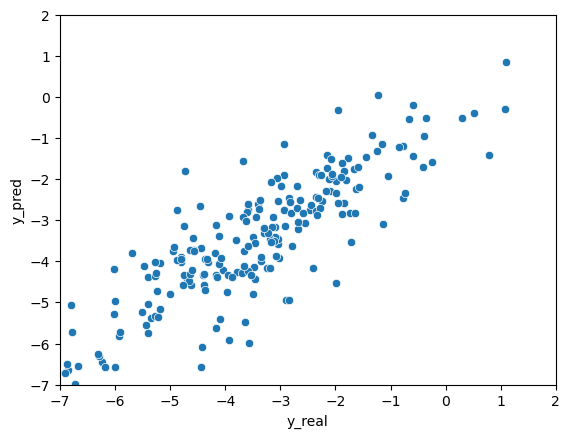

elapsed time: 42.89759969711304
run: 50
{'hidden_feats': [512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F88DAE80>, <dgl.data.utils.Subset object at 0x00000238F886AE80>, <dgl.data.utils.Subset object at 0x00000238FF17DF70>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): 

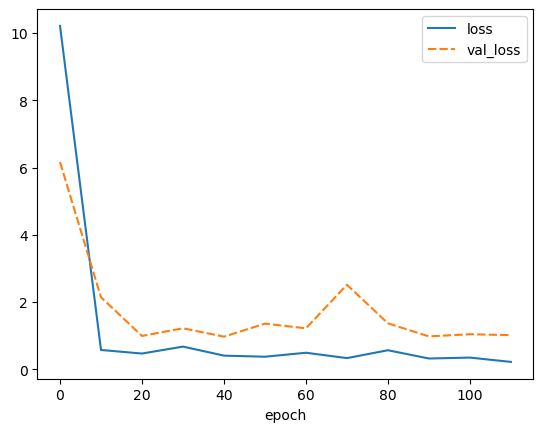

best weights loaded


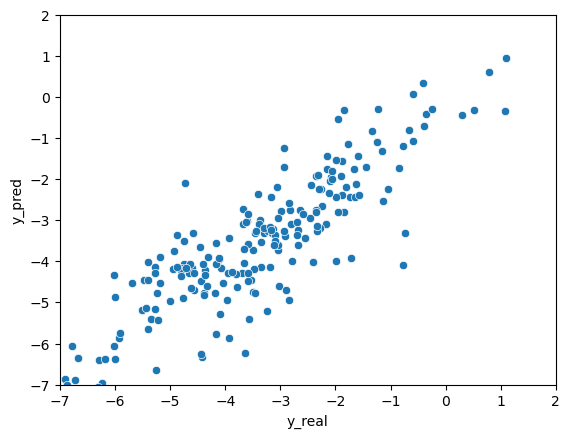

elapsed time: 40.06548857688904
run: 51
{'hidden_feats': [512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F89DD280>, <dgl.data.utils.Subset object at 0x000002385CBBFA60>, <dgl.data.utils.Subset object at 0x000002385CBBF1F0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict):

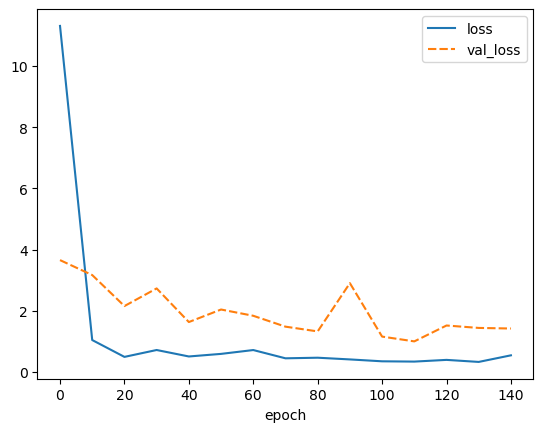

best weights loaded


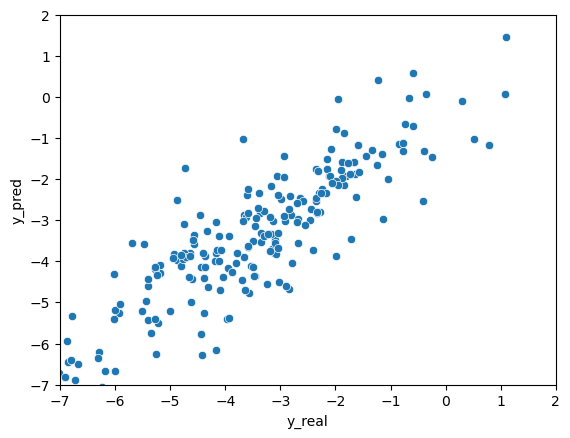

elapsed time: 54.30242896080017
run: 52
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385CA4C6D0>, <dgl.data.utils.Subset object at 0x00000238F86EBD60>, <dgl.data.utils.Subset object at 0x00000238F86EBDC0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

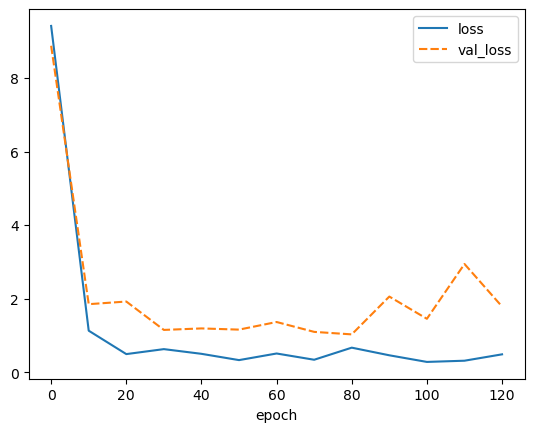

best weights loaded


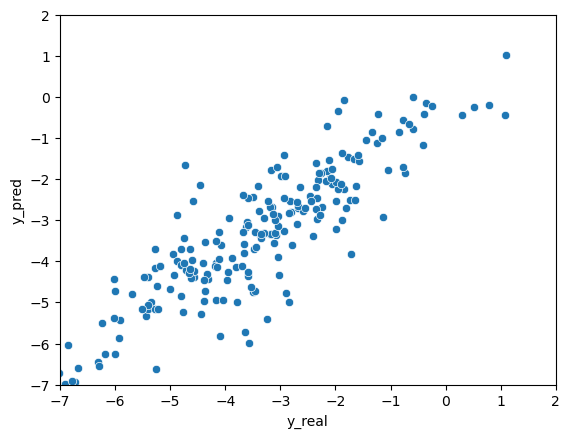

elapsed time: 49.86133790016174
run: 53
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C86CFD0>, <dgl.data.utils.Subset object at 0x000002385C878700>, <dgl.data.utils.Subset object at 0x000002385C89D5E0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

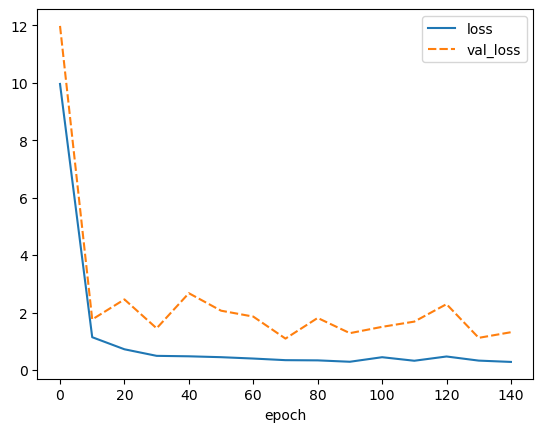

best weights loaded


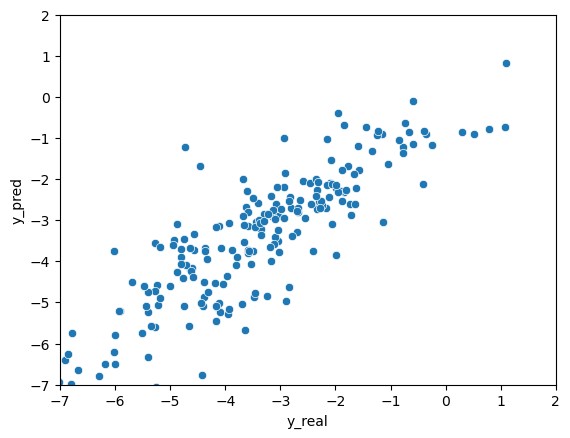

elapsed time: 57.4111750125885
run: 54
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C810790>, <dgl.data.utils.Subset object at 0x000002385CAAD880>, <dgl.data.utils.Subset object at 0x000002385CAADFA0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fea

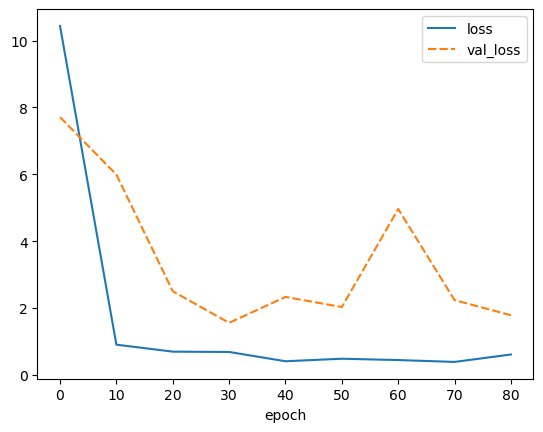

best weights loaded


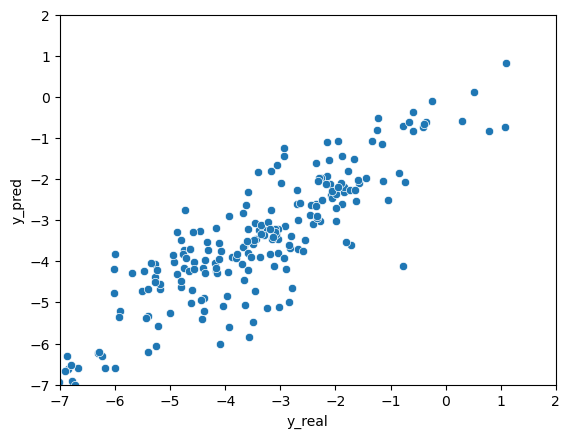

elapsed time: 38.58675289154053
run: 55
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C796820>, <dgl.data.utils.Subset object at 0x000002385CADD9A0>, <dgl.data.utils.Subset object at 0x000002385CADDA30>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_f

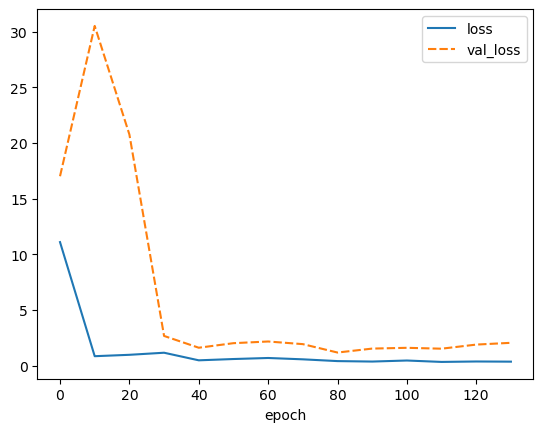

best weights loaded


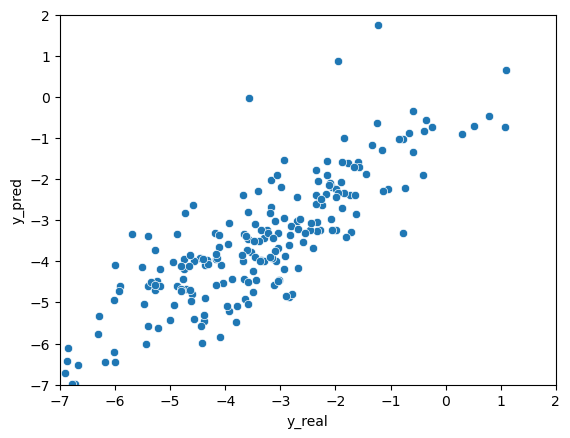

elapsed time: 63.95085024833679
run: 56
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C864280>, <dgl.data.utils.Subset object at 0x00000238FF142940>, <dgl.data.utils.Subset object at 0x00000238FF142BB0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): L

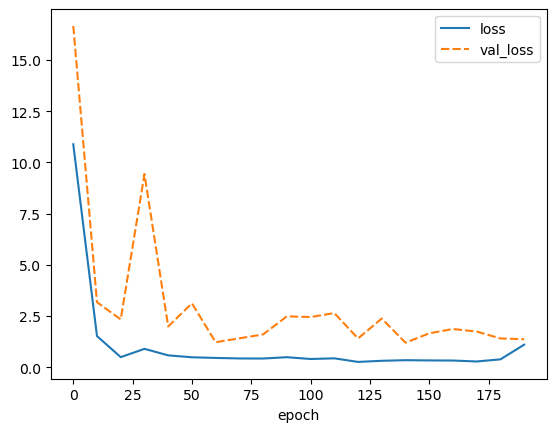

best weights loaded


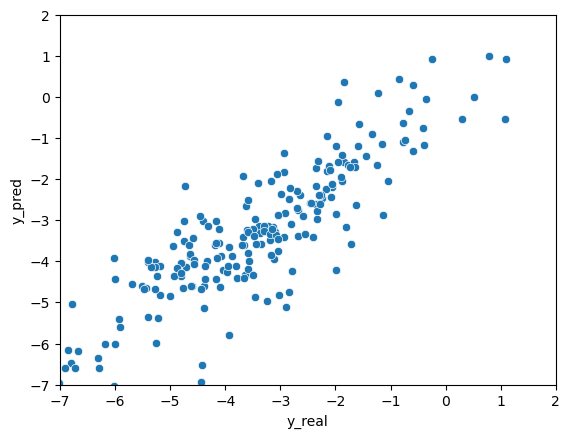

elapsed time: 95.65669202804565
run: 57
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385C96B400>, <dgl.data.utils.Subset object at 0x00000238FF1EC8E0>, <dgl.data.utils.Subset object at 0x00000238FF1ECAF0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): L

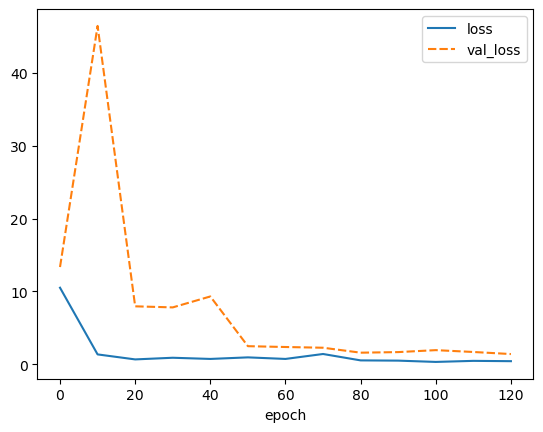

best weights loaded


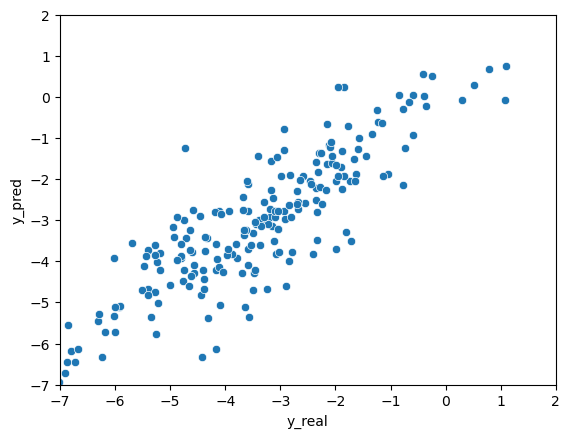

elapsed time: 60.03259015083313
run: 58
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385CB8DD00>, <dgl.data.utils.Subset object at 0x00000238FF119370>, <dgl.data.utils.Subset object at 0x00000238FF1193A0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): L

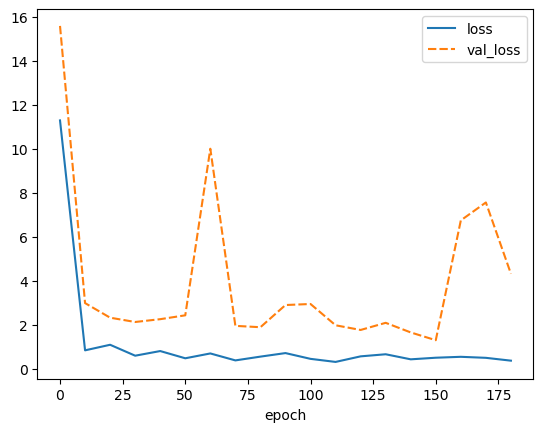

best weights loaded


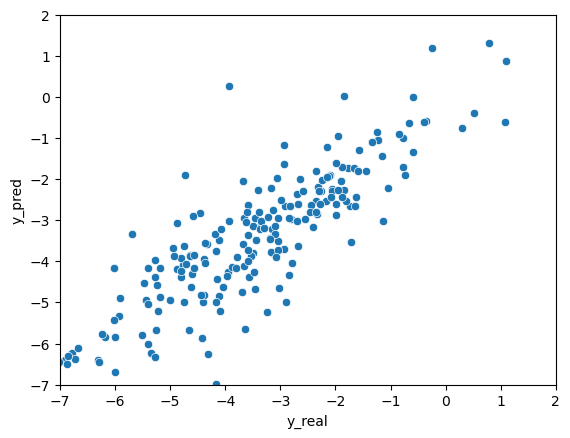

elapsed time: 83.52771806716919
run: 59
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x000002385CA71DF0>, <dgl.data.utils.Subset object at 0x000002385C70D970>, <dgl.data.utils.Subset object at 0x000002385C70DD90>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): 

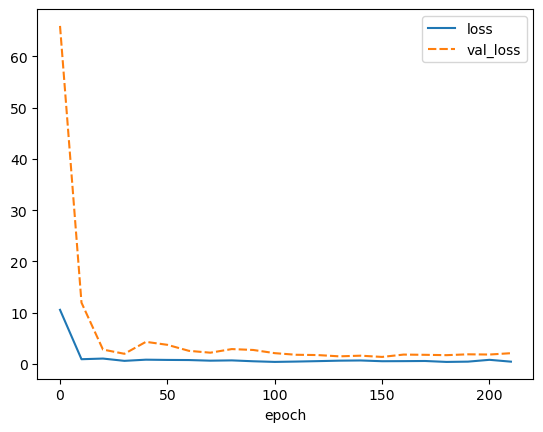

best weights loaded


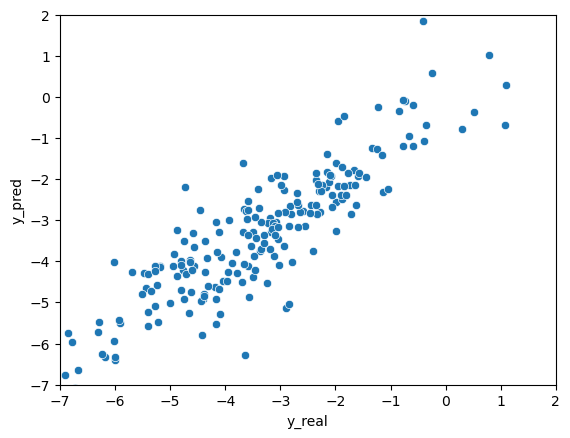

elapsed time: 100.88144326210022
run: 60
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F847C2B0>, <dgl.data.utils.Subset object at 0x00000238FF105FD0>, <dgl.data.utils.Subset object at 0x00000238FF10B970>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connecti

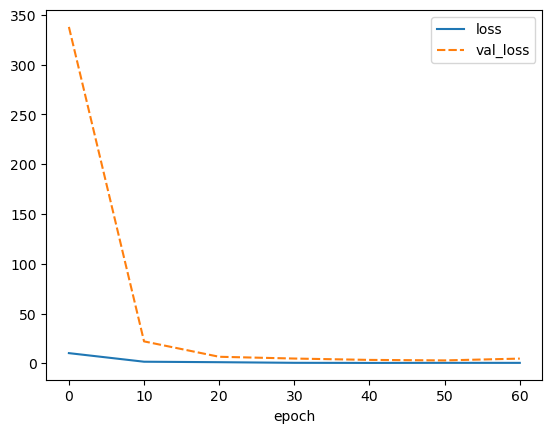

best weights loaded


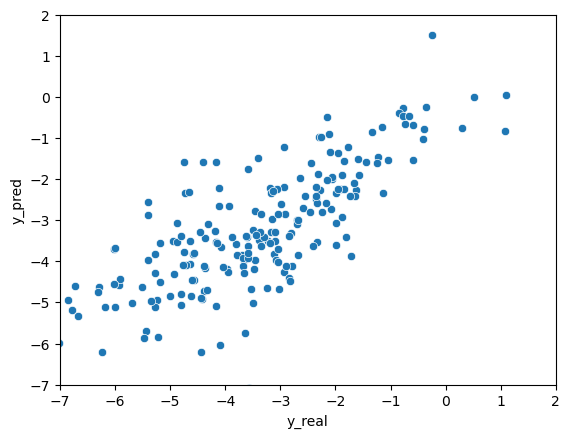

elapsed time: 35.374566078186035
run: 61
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F89C79A0>, <dgl.data.utils.Subset object at 0x00000238FF132670>, <dgl.data.utils.Subset object at 0x00000238FF132520>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connecti

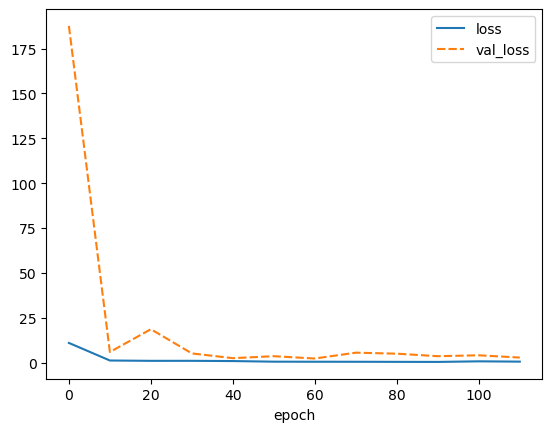

best weights loaded


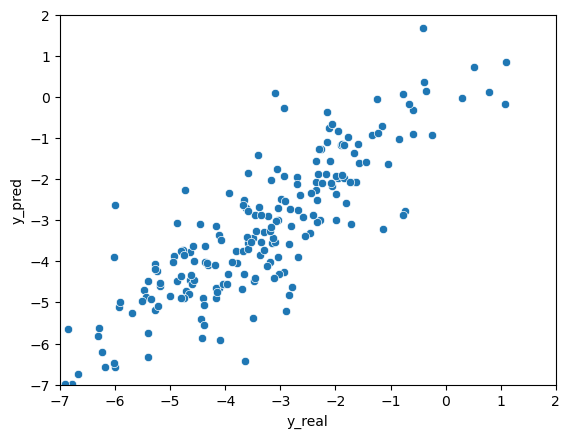

elapsed time: 59.004260301589966
run: 62
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x0000023835CFB5E0>, <dgl.data.utils.Subset object at 0x00000238FDCC3D30>, <dgl.data.utils.Subset object at 0x00000238FBA6B1C0>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connecti

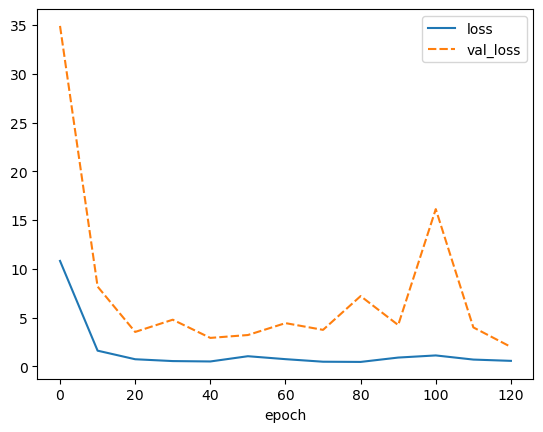

best weights loaded


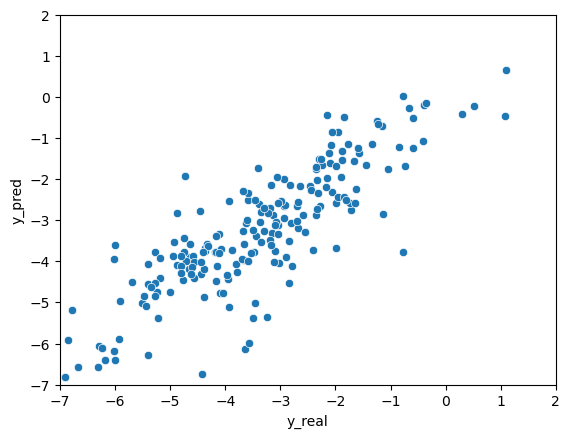

elapsed time: 68.29279041290283
run: 63
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
[<dgl.data.utils.Subset object at 0x00000238F875DEB0>, <dgl.data.utils.Subset object at 0x00000238FF1983D0>, <dgl.data.utils.Subset object at 0x00000238FF198280>]
There was a problem with 
C
 at index 248
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000023851AC7E50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connecti

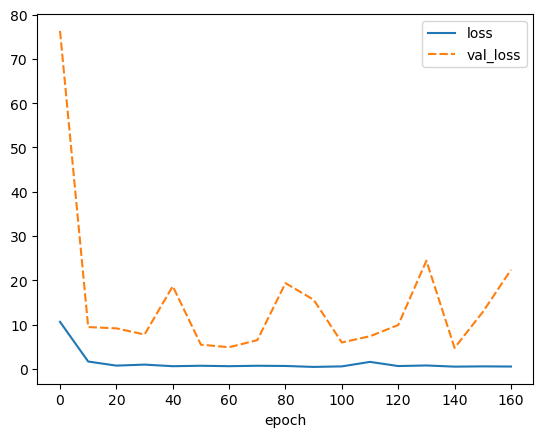

best weights loaded


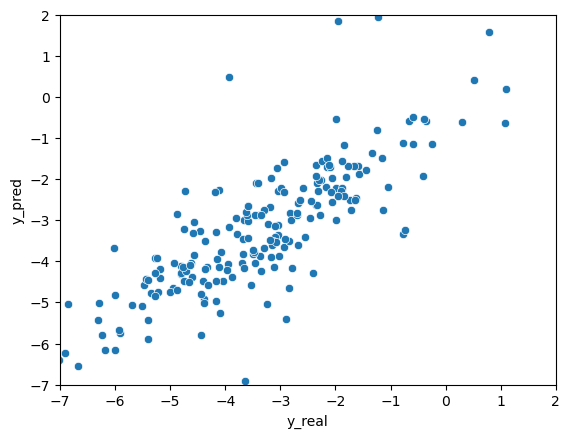

elapsed time: 93.9183075428009


In [14]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()
    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    '''
    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 
    '''
    hidden_feats = combination_dict["hidden_feats"]
    predictor_hidden_feats = combination_dict["predictor_hidden_feats"]

    if create_new_data:
        data, data_y = load_esol()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, apply_scaffold_split = apply_scaffold_split )
        #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
        loader, test_loader = create_dgl_dataloader(train_dataset, test_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_reg_esol.pkl'
        else: 
            loader_file = 'datasets_reg_esol.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders

        train_dataset, test_dataset, val_dataset = create_dgl_sets(datasets=[train_dataset, test_dataset, val_dataset])

        '''
        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)

        else:
        '''
            
        #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
        loader, test_loader = create_dgl_dataloader(train_dataset, test_dataset, batch_size=batch_size)
        

    #if not use_fingerprints:
    #model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate)
    model, device, optimizer, loss_fn = initialize_dgl_regression_model(in_feats=train_dataset[0][0].ndata["h"].shape[-1], hidden_feats=hidden_feats, gnn_norm=None, activation=None, residual=None, batchnorm=None, dropout=None, classifier_dropout=0.0, n_tasks=1, predictor_hidden_feats=predictor_hidden_feats, predictor_dropout=0.0)

    #model, best_model_weights, losses, val_losses = regression_train(model, loader, test_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
    model, best_model_weights, losses, val_losses = regression_dgl_train(model, loader, test_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
    
    plt.show()
    #mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)
    mean_mse, mean_l1, dfs = predict_dgl_regression(model, test_loader, device, best_model_weights, plot_final = True)

    '''
    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, test_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)
    '''


    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #regression
    save_dict["mean_mse"] = mean_mse
    save_dict["mean_l1"] = mean_l1

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    '''
    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names
    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp
    '''

    save_dict["hidden_feats"] = hidden_feats
    save_dict["predictor_hidden_feats"] = predictor_hidden_feats

    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    